# Part 2-House prices

# Data import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style


import seaborn as sns
import warnings

import scipy.stats as stats
from scipy.stats import skew

from math import sqrt

from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


%matplotlib inline
warnings.filterwarnings('ignore')


# A quick look at the data

In [2]:
train_df=pd.read_csv('house-prices.csv')

In [3]:
train_df = train_df.reset_index()

In [4]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [5]:
train_df.sample(5)

index  Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area  \
520     520    603  534277090           20        RL           NaN      9450   
2307   2307   2643  902108060           70        RM          66.0      3960   
271     271   1078  528188090          160        RL          36.0      2448   
53       53   1042  527450520          160        RM          21.0      1890   
965     965   1644  527301080           20        RL           NaN     12546   

     Street Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
520    Pave   NaN       IR1          Lvl    AllPub     Corner        Gtl   
2307   Pave  Grvl       Reg          Lvl    AllPub     Inside        Gtl   
271    Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl   
53     Pave   NaN       Reg          Lvl    AllPub     Inside        Gtl   
965    Pave   NaN       IR1          Lvl    AllPub     Corner        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
520         NAmes        Norm        Norm      1Fam      1Story             4   
2307      OldTown        Norm        Norm      1Fam      2Story             7   
271       NridgHt        Norm        Norm     Twnhs      2Story             7   
53         BrDale        Norm        Norm     Twnhs      2Story             6   
965        NWAmes        Norm        Norm      1Fam      1Story             6   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
520              5        1957            1957      Gable   CompShg   
2307             8        1930            1950      Gable   CompShg   
271              5        2003            2004      Gable   CompShg   
53               6        1972            1972      Gable   CompShg   
965              7        1981            1981      Gable   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
520       Wd Sdng      Wd Sdng      BrkFace         160.0         TA   
2307      Wd Sdng      Wd Sdng         None           0.0         TA   
271       VinylSd      Wd Shng        Stone         106.0         Gd   
53        HdBoard      HdBoard      BrkFace         422.0         TA   
965       MetalSd      MetalSd      BrkFace         310.0         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
520          TA     CBlock        TA        TA            No            BLQ   
2307         TA     BrkTil        TA        TA            No            Unf   
271          TA      PConc        Gd        TA            No            Unf   
53           TA     CBlock        TA        TA            No            LwQ   
965          Gd     CBlock        Gd        TA            No            BLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
520          775.0            Unf           0.0        265.0         1040.0   
2307           0.0            Unf           0.0        502.0          502.0   
271            0.0            Unf           0.0        764.0          764.0   
53           483.0            Unf           0.0          0.0          483.0   
965          678.0            Unf           0.0        762.0         1440.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
520     GasA         TA           Y      SBrkr        1362           0   
2307    GasA         TA           N      SBrkr         502         502   
271     GasA         Ex           Y      SBrkr         764         862   
53      GasA         Gd           Y      SBrkr         483         504   
965     GasA         Ex           Y      SBrkr        1440           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
520                 0         1362             1.0             0.0          1   
2307                0         1004             0.0             0.0          1   
271                 0         1626             0.0             0.0          2   
53

In [6]:
# It is necessary to remove white spaces from the column names since this might cause some problems (we see this request in project2 it was very useful)
train_df.columns = train_df.columns.str.replace(' ', '')
train_df.tail()

index  Order        PID  MSSubClass MSZoning  LotFrontage  LotArea  \
2425   2425    764  904301070          90       RL         60.0    10800   
2426   2426    836  907126010          20       RL         82.0    12464   
2427   2427   1654  527353080          60       RL         80.0    11584   
2428   2428   2608  535402070          80       RL         85.0    13400   
2429   2429   2733  905402110          20       RL         75.0     9375   

     Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
2425   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2426   Pave   NaN      IR2         Low    AllPub    Corner       Mod   
2427   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2428   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2429   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
2425      Edwards       Norm       Norm   Duplex     1Story            5   
2426      CollgCr       Norm       Norm     1Fam     1Story            5   
2427       NWAmes       Norm       Norm     1Fam       SLvl            7   
2428        NAmes       Norm       Norm     1Fam       SLvl            5   
2429      Edwards       Norm       Norm     1Fam     1Story            4   

      OverallCond  YearBuilt  YearRemod/Add RoofStyle RoofMatl Exterior1st  \
2425            5       1987           1988     Gable  CompShg     Plywood   
2426            5       1996           1996     Gable  CompShg     VinylSd   
2427            6       1979           1979       Hip  CompShg     HdBoard   
2428            5       1966           1966     Gable  CompShg     VinylSd   
2429            5       1954           1954     Gable  CompShg     MetalSd   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
2425     Plywood       None         0.0        TA        Gd     CBlock   
2426     VinylSd       None         0.0        TA        Gd      PConc   
2427     HdBoard    BrkFace        96.0        TA        TA     CBlock   
2428     VinylSd    BrkFace      1047.0        TA        TA     CBlock   
2429     MetalSd       None         0.0        TA        Gd     CBlock   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
2425       Gd       Gd           Gd          GLQ      1200.0          Unf   
2426       Gd       TA           No          GLQ       732.0          Unf   
2427       TA       TA           No          GLQ       315.0          Rec   
2428       TA       TA           Av          ALQ       516.0          BLQ   
2429       TA       TA           No          Rec       799.0          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
2425         0.0        0.0       1200.0    GasA        TA          Y   
2426         0.0      308.0       1040.0    GasA        Gd          Y   
2427       110.0      114.0        539.0    GasA        TA          Y   
2428       128.0      380.0       1024.0    GasA        TA          Y   
2429         0.0      168.0        967.0    GasA        Ex          Y   

     Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
2425      SBrkr      1200         0             0       1200           3.0   
2426      SBrkr      1040         0             0       1040           1.0   
2427      SBrkr      1040       685             0       1725           0.0   
2428      SBrkr      1086         0             0       1086           1.0   
2429      SBrkr      1350         0             0       1350           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
2425           0.0         3         0             3             1   
2426           0.0         1         0             3             1   
2427           0.0         2         1             3             1   
2428           0.0         1         0             3             1   
2429           0.0      

In [7]:
#Now we have to prepare test set data because it is important to apply the same process on the train and on the test data set.
pred_df=pd.read_csv('house-prices-test.csv')
pred_df.columns = pred_df.columns.str.replace(' ', '')
pred_df.head()


Order        PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0   2217  909279080          50       RL          NaN    11275   Pave   NaN   
1    837  907126050          20       RL         65.0     9757   Pave   NaN   
2   2397  528144030          60       RL         86.0    11065   Pave   NaN   
3   1963  535452060          20       RL         70.0     7000   Pave   NaN   
4    306  911202100          50  C (all)         66.0     8712   Pave  Pave   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      IR1         HLS    AllPub    Corner       Mod      Crawfor       Norm   
1      Reg         Low    AllPub    Inside       Mod      CollgCr       Norm   
2      IR1         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
3      Reg         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
4      Reg         HLS    AllPub    Inside       Mod       IDOTRR       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1.5Fin            6            7       1932   
1       Norm     1Fam     1Story            5            7       1994   
2       Norm     1Fam     2Story            8            5       2006   
3       Norm     1Fam     1Story            5            7       1960   
4       Norm     1Fam     1.5Fin            4            7       1900   

   YearRemod/Add RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           1950     Gable  CompShg     MetalSd     MetalSd    BrkFace   
1           1994     Gable  CompShg     VinylSd     VinylSd       None   
2           2006     Gable  CompShg     VinylSd     VinylSd      Stone   
3           2002     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
4           1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       480.0        TA        TA     CBlock       TA       TA           Mn   
1         0.0        TA        Gd      PConc       TA       TA           No   
2       788.0        Gd        TA      PConc       Gd       TA           Mn   
3        45.0        TA        TA     CBlock       TA       TA           No   
4         0.0        TA        TA      Stone       TA       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       297.0          LwQ       557.0        0.0        854.0   
1          ALQ       755.0          Unf         0.0      235.0        990.0   
2          Unf         0.0          Unf         0.0     1085.0       1085.0   
3          Rec       588.0          Unf         0.0      422.0       1010.0   
4          Unf         0.0          Unf         0.0      859.0        859.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr      1096       895             0   
1    GasA        Ex          Y      SBrkr       990         0             0   
2    GasA        Ex          Y      SBrkr      1120       850             0   
3    GasA        Ex          Y      SBrkr      1134         0             0   
4    GasA        Gd          Y      SBrkr       859       319             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1991           0.0           0.0         1         1             3   
1        990           1.0           0.0         1         0             3   
2       1970           0.0           0.0         2         1             3   
3       1134           0.0           0.0         1         0             2   
4       1178           0.0           0.0         1         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             7        Typ           1          Gd   
1             1          TA             5        Typ           0         NaN   
2             1          Ex  

In [8]:
pred_df.tail()

Order        PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
495    235  905378040          50       RL        124.0    18600   Pave   NaN   
496   2518  533252020          20       RL          NaN    11250   Pave   NaN   
497    350  527127100         120       RL         28.0     7296   Pave   NaN   
498    821  906340120          20       RL         61.0    10226   Pave   NaN   
499   2005  902427180          80       RM         76.0    11800   Pave   NaN   

    LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
495      Reg         Lvl    AllPub    Inside       Gtl      Edwards   
496      IR1         Lvl    AllPub    Inside       Gtl      Veenker   
497      IR1         Lvl    AllPub   CulDSac       Gtl      StoneBr   
498      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
499      Reg         Lvl    AllPub    Inside       Gtl      OldTown   

    Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
495       Norm       Norm     1Fam     1.5Fin            3            4   
496       Norm       Norm     1Fam     1Story            6            6   
497       Norm       Norm   TwnhsE     1Story            8            5   
498       Norm       Norm     1Fam     1Story            8            5   
499       Norm       Norm     1Fam       SLvl            4            7   

     YearBuilt  YearRemod/Add RoofStyle RoofMatl Exterior1st Exterior2nd  \
495       1938           1990     Gable  CompShg     Wd Sdng     Wd Sdng   
496       1977           1977     Gable  CompShg     Plywood     Plywood   
497       2004           2005     Gable  CompShg     CemntBd     CmentBd   
498       2008           2008     Gable  CompShg     VinylSd     VinylSd   
499       1949           2002     Gable  CompShg      Stucco     Wd Sdng   

    MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
495       None         0.0        TA        TA     CBlock       TA       TA   
496       None         0.0        Gd        TA     CBlock       Gd       TA   
497       None         0.0        Gd        TA      PConc       Ex       TA   
498      Stone       270.0        Gd        TA      PConc       Ex       TA   
499       None         0.0        TA        TA       Slab      NaN      NaN   

    BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
495           Mn          BLQ       288.0          LwQ       684.0        0.0   
496           No          ALQ       767.0          Unf         0.0      441.0   
497           Av          GLQ      1965.0          Unf         0.0      243.0   
498           Gd          Unf         0.0          Unf         0.0     1622.0   
499          NaN          NaN         0.0          NaN         0.0        0.0   

     TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
495        972.0    GasA        TA          Y      FuseA      1052       558   
496       1208.0    GasA        TA          Y      SBrkr      1208         0   
497       2208.0    GasA        Ex          Y      SBrkr      2522         0   
498       1622.0    GasA        Ex          Y      SBrkr      1630         0   
499          0.0    GasA        Ex          Y      SBrkr      1382         0   

     LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
495             0       1610           0.0           1.0         2         0   
496             0       1208           1.0           0.0         1         1   
497             0       2522           1.0           0.0         2         0   
498             0       1630           1.0           0.0         2         0   
499             0       1382           0.0           0.0         2         0   

     BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
495             4             1          Fa             8        Typ   
496             3             1          TA             6        Typ   
497             1             1          Gd

In [9]:
pred_df.shape,train_df.shape

((500, 81), (2430, 83))

In [10]:
train_df.drop(columns=['Order'], inplace=True)
pred_df.drop(columns=['Order'], inplace=True)

In [11]:
train_df.describe().T

count          mean           std          min           25%  \
index          2430.0  1.214500e+03  7.016249e+02          0.0  6.072500e+02   
PID            2430.0  7.149375e+08  1.887339e+08  526301100.0  5.284770e+08   
MSSubClass     2430.0  5.709259e+01  4.290325e+01         20.0  2.000000e+01   
LotFrontage    2010.0  6.920199e+01  2.348699e+01         21.0  5.800000e+01   
LotArea        2430.0  1.024356e+04  8.353925e+03       1470.0  7.482000e+03   
OverallQual    2430.0  6.088889e+00  1.414621e+00          1.0  5.000000e+00   
OverallCond    2430.0  5.569959e+00  1.116442e+00          1.0  5.000000e+00   
YearBuilt      2430.0  1.971167e+03  3.020793e+01       1875.0  1.954000e+03   
YearRemod/Add  2430.0  1.984239e+03  2.075116e+01       1950.0  1.966000e+03   
MasVnrArea     2410.0  1.019954e+02  1.766117e+02          0.0  0.000000e+00   
BsmtFinSF1     2429.0  4.439444e+02  4.574536e+02          0.0  0.000000e+00   
BsmtFinSF2     2429.0  5.107369e+01  1.721435e+02          0.0  0.000000e+00   
BsmtUnfSF      2429.0  5.564809e+02  4.396501e+02          0.0  2.160000e+02   
TotalBsmtSF    2429.0  1.051499e+03  4.446900e+02          0.0  7.940000e+02   
1stFlrSF       2430.0  1.159845e+03  3.930976e+02        334.0  8.805000e+02   
2ndFlrSF       2430.0  3.266728e+02  4.194908e+02          0.0  0.000000e+00   
LowQualFinSF   2430.0  4.586831e+00  4.721618e+01          0.0  0.000000e+00   
GrLivArea      2430.0  1.491105e+03  4.961783e+02        334.0  1.120000e+03   
BsmtFullBath   2428.0  4.341021e-01  5.279405e-01          0.0  0.000000e+00   
BsmtHalfBath   2428.0  6.013180e-02  2.429227e-01          0.0  0.000000e+00   
FullBath       2430.0  1.560905e+00  5.483934e-01          0.0  1.000000e+00   
HalfBath       2430.0  3.695473e-01  5.011910e-01          0.0  0.000000e+00   
BedroomAbvGr   2430.0  2.842798e+00  8.176594e-01          0.0  2.000000e+00   
KitchenAbvGr   2430.0  1.042798e+00  2.084554e-01          0.0  1.000000e+00   
TotRmsAbvGrd   2430.0  6.409053e+00  1.551557e+00          2.0  5.000000e+00   
Fireplaces     2430.0  5.950617e-01  6.465988e-01          0.0  0.000000e+00   
GarageYrBlt    2292.0  1.977861e+03  2.554487e+01       1896.0  1.960000e+03   
GarageCars     2429.0  1.762454e+00  7.582429e-01          0.0  1.000000e+00   
GarageArea     2429.0  4.719794e+02  2.157535e+02          0.0  3.240000e+02   
WoodDeckSF     2430.0  9.391770e+01  1.281069e+02          0.0  0.000000e+00   
OpenPorchSF    2430.0  4.709177e+01  6.712385e+01          0.0  0.000000e+00   
EnclosedPorch  2430.0  2.229465e+01  6.238641e+01          0.0  0.000000e+00   
3SsnPorch      2430.0  2.471605e+00  2.488024e+01          0.0  0.000000e+00   
ScreenPorch    2430.0  1.652922e+01  5.682223e+01          0.0  0.000000e+00   
PoolArea       2430.0  2.401235e+00  3.611199e+01          0.0  0.000000e+00   
MiscVal        2430.0  5.617984e+01  6.166615e+02          0.0  0.000000e+00   
MoSold         2430.0  6.209465e+00  2.721942e+00          1.0  4.000000e+00   
YrSold         2430.0  2.007784e+03  1.311843e+00       2006.0  2.007000e+03   
SalePrice      2430.0  1.801997e+05  7.960747e+04      12789.0  1.290000e+05   

                       50%           75%           max  
index               1214.5  1.821750e+03  2.429000e+03  
PID            535454055.0  9.071352e+08  1.007100e+09  
MSSubClass            50.0  7.000000e+01  1.900000e+02  
LotFrontage           68.0  8.000000e+01  3.130000e+02  
LotArea             9500.0  1.160450e+04  2.152450e+05  
OverallQual            6.0  7.000000e+00  1.000000e+01  
OverallCond            5.0  6.000000e+00  9.000000e+00  
YearBuilt           1973.0  2.000000e+03  2.010000e+03  
YearRemod/Add       1993.0  2.003000e+03  2.010000e+03  
MasVnrArea             0.0  1.647500e+02  1.600000e+03  
BsmtFinSF1           375.0  7.370000e+02  5.644000e+03  
BsmtFinSF2             0.0  0.000000e+00  1.526000e+03  
BsmtUnfSF            462.0  7.990000e+02  2.336000e+03  
TotalBsmtSF      

In [12]:
pred_df.describe().T

count          mean           std          min           25%  \
PID            500.0  7.121658e+08  1.888879e+08  526351030.0  5.284576e+08   
MSSubClass     500.0  5.882000e+01  4.133673e+01         20.0  2.000000e+01   
LotFrontage    430.0  6.933023e+01  2.281460e+01         21.0  5.900000e+01   
LotArea        500.0  9.683132e+03  4.950630e+03       1300.0  7.329000e+03   
OverallQual    500.0  6.124000e+00  1.394458e+00          2.0  5.000000e+00   
OverallCond    500.0  5.530000e+00  1.087873e+00          1.0  5.000000e+00   
YearBuilt      500.0  1.972274e+03  3.044030e+01       1872.0  1.953000e+03   
YearRemod/Add  500.0  1.984402e+03  2.140338e+01       1950.0  1.964000e+03   
MasVnrArea     497.0  1.014185e+02  1.909622e+02          0.0  0.000000e+00   
BsmtFinSF1     500.0  4.362420e+02  4.468265e+02          0.0  0.000000e+00   
BsmtFinSF2     500.0  4.315800e+01  1.538912e+02          0.0  0.000000e+00   
BsmtUnfSF      500.0  5.727760e+02  4.389241e+02          0.0  2.427500e+02   
TotalBsmtSF    500.0  1.052176e+03  4.206862e+02          0.0  7.840000e+02   
1stFlrSF       500.0  1.158160e+03  3.863584e+02        494.0  8.640000e+02   
2ndFlrSF       500.0  3.781420e+02  4.673784e+02          0.0  0.000000e+00   
LowQualFinSF   500.0  5.114000e+00  4.167030e+01          0.0  0.000000e+00   
GrLivArea      500.0  1.541416e+03  5.472142e+02        540.0  1.173500e+03   
BsmtFullBath   500.0  4.180000e-01  5.097015e-01          0.0  0.000000e+00   
BsmtHalfBath   500.0  6.600000e-02  2.564674e-01          0.0  0.000000e+00   
FullBath       500.0  1.594000e+00  5.743027e-01          0.0  1.000000e+00   
HalfBath       500.0  4.280000e-01  5.072777e-01          0.0  0.000000e+00   
BedroomAbvGr   500.0  2.910000e+00  8.737430e-01          1.0  2.000000e+00   
KitchenAbvGr   500.0  1.052000e+00  2.396056e-01          0.0  1.000000e+00   
TotRmsAbvGrd   500.0  6.608000e+00  1.664896e+00          3.0  6.000000e+00   
Fireplaces     500.0  6.200000e-01  6.545662e-01          0.0  0.000000e+00   
GarageYrBlt    479.0  1.979430e+03  2.543609e+01       1895.0  1.960000e+03   
GarageCars     500.0  1.788000e+00  7.721713e-01          0.0  1.000000e+00   
GarageArea     500.0  4.769020e+02  2.117443e+02          0.0  3.127500e+02   
WoodDeckSF     500.0  9.294600e+01  1.176286e+02          0.0  0.000000e+00   
OpenPorchSF    500.0  4.968000e+01  6.923265e+01          0.0  0.000000e+00   
EnclosedPorch  500.0  2.649600e+01  7.201969e+01          0.0  0.000000e+00   
3SsnPorch      500.0  3.180000e+00  2.639145e+01          0.0  0.000000e+00   
ScreenPorch    500.0  1.344000e+01  5.234767e+01          0.0  0.000000e+00   
PoolArea       500.0  1.476000e+00  3.300436e+01          0.0  0.000000e+00   
MiscVal        500.0  2.368800e+01  1.753751e+02          0.0  0.000000e+00   
MoSold         500.0  6.248000e+00  2.680460e+00          1.0  4.000000e+00   
YrSold         500.0  2.007824e+03  1.340380e+00       2006.0  2.007000e+03   

                       50%           75%          max  
PID            535453170.0  9.072555e+08  923277080.0  
MSSubClass            60.0  7.500000e+01        190.0  
LotFrontage           69.0  8.000000e+01        153.0  
LotArea             9150.5  1.131275e+04      53504.0  
OverallQual            6.0  7.000000e+00         10.0  
OverallCond            5.0  6.000000e+00          9.0  
YearBuilt           1975.0  2.001250e+03       2010.0  
YearRemod/Add       1994.0  2.004000e+03       2010.0  
MasVnrArea             0.0  1.480000e+02       1378.0  
BsmtFinSF1           342.5  7.062500e+02       2260.0  
BsmtFinSF2             0.0  0.000000e+00       1474.0  
BsmtUnfSF            478.0  8.115000e+02       1969.0  
TotalBsmtSF          990.0  1.303000e+03       3200.0  
1stFlrSF            1077.5  1.382250e+03       3228.0  
2ndFlrSF               0.0  7.312500e+02       1796.0  
LowQualFinSF           0.0  0.000000e+00        514.0  
GrLivArea           1454.5  1.769500e+03       4676.0  
Bsmt

In [13]:
## We need to have a global view of all features 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2430 non-null   int64  
 1   PID            2430 non-null   int64  
 2   MSSubClass     2430 non-null   int64  
 3   MSZoning       2430 non-null   object 
 4   LotFrontage    2010 non-null   float64
 5   LotArea        2430 non-null   int64  
 6   Street         2430 non-null   object 
 7   Alley          163 non-null    object 
 8   LotShape       2430 non-null   object 
 9   LandContour    2430 non-null   object 
 10  Utilities      2430 non-null   object 
 11  LotConfig      2430 non-null   object 
 12  LandSlope      2430 non-null   object 
 13  Neighborhood   2430 non-null   object 
 14  Condition1     2430 non-null   object 
 15  Condition2     2430 non-null   object 
 16  BldgType       2430 non-null   object 
 17  HouseStyle     2430 non-null   object 
 18  OverallQ

In [14]:
## We need to have a global view of all features 
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            500 non-null    int64  
 1   MSSubClass     500 non-null    int64  
 2   MSZoning       500 non-null    object 
 3   LotFrontage    430 non-null    float64
 4   LotArea        500 non-null    int64  
 5   Street         500 non-null    object 
 6   Alley          35 non-null     object 
 7   LotShape       500 non-null    object 
 8   LandContour    500 non-null    object 
 9   Utilities      500 non-null    object 
 10  LotConfig      500 non-null    object 
 11  LandSlope      500 non-null    object 
 12  Neighborhood   500 non-null    object 
 13  Condition1     500 non-null    object 
 14  Condition2     500 non-null    object 
 15  BldgType       500 non-null    object 
 16  HouseStyle     500 non-null    object 
 17  OverallQual    500 non-null    int64  
 18  OverallCon

In [15]:
train_df.isnull().sample(5)

index    PID  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
215   False  False       False     False        False    False   False   True   
970   False  False       False     False         True    False   False   True   
2254  False  False       False     False         True    False   False   True   
858   False  False       False     False        False    False   False   True   
1133  False  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
215      False        False      False      False      False         False   
970      False        False      False      False      False         False   
2254     False        False      False      False      False         False   
858      False        False      False      False      False         False   
1133     False        False      False      False      False         False   

      Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
215        False       False     False       False        False        False   
970        False       False     False       False        False        False   
2254       False       False     False       False        False        False   
858        False       False     False       False        False        False   
1133       False       False     False       False        False        False   

      YearBuilt  YearRemod/Add  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
215       False          False      False     False        False        False   
970       False          False      False     False        False        False   
2254      False          False      False     False        False        False   
858       False          False      False     False        False        False   
1133      False          False      False     False        False        False   

      MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
215        False       False      False      False       False     False   
970        False       False      False      False       False     False   
2254       False       False      False      False       False     False   
858        False       False      False      False       False     False   
1133       False       False      False      False       False      True   

      BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
215      False         False         False       False         False   
970      False         False         False       False         False   
2254     False         False         False       False         False   
858      False         False         False       False         False   
1133      True          True          True       False          True   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
215        False      False        False    False      False       False   
970        False      False        False    False      False       False   
2254       False      False        False    False      False       False   
858        False      False        False    False      False       False   
1133       False      False        False    False      False       False   

      Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
215        False     False     False         False      False         False   
970        False     False     False         False      False         False   
2254       False     False     False         False      False         False   
858        False     False     False         False      False         False   
1133       False     False     False         False      False         False   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
215          False     False     False         False         False   
970          False     False     False         False         False   
2254         False     False     False         Fal

Thanks to the request ".info()" and "isnull()" we have several types of observations we can did:
    -unfortunately we have missing values
    -the majority are objects

# Data cleaning

### Proportion/count missing values for each columns

In [16]:
#result1=((data_df.isnull() | data_df.isna()).sum() * 100 / data_df.index.size).round(2)
result1=((train_df.isna()).sum() * 100 / train_df.index.size).round(2)
print(result1.head(10))

index           0.00
PID             0.00
MSSubClass      0.00
MSZoning        0.00
LotFrontage    17.28
LotArea         0.00
Street          0.00
Alley          93.29
LotShape        0.00
LandContour     0.00
dtype: float64


In [17]:
result1.sort_values(ascending=False)

PoolQC           99.51
MiscFeature      96.30
Alley            93.29
Fence            79.88
FireplaceQu      48.81
LotFrontage      17.28
GarageQual        5.68
GarageYrBlt       5.68
GarageCond        5.68
GarageFinish      5.68
GarageType        5.60
BsmtExposure      3.05
BsmtFinType2      2.96
BsmtFinType1      2.92
BsmtCond          2.92
BsmtQual          2.92
MasVnrType        0.82
MasVnrArea        0.82
BsmtFullBath      0.08
BsmtHalfBath      0.08
GarageArea        0.04
GarageCars        0.04
TotalBsmtSF       0.04
BsmtUnfSF         0.04
BsmtFinSF2        0.04
BsmtFinSF1        0.04
Electrical        0.04
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearRemod/Add     0.00
YearBuilt         0.00
SalePrice         0.00
OverallCond       0.00
OverallQual       0.00
PID               0.00
MSSubClass        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities  

In [18]:
result1.nlargest()

PoolQC         99.51
MiscFeature    96.30
Alley          93.29
Fence          79.88
FireplaceQu    48.81
dtype: float64

### Connecting to the previous point, and adding to my investigation - what I could also do is for example plot the amount of missing values per feature. As a suggestion, with something like this:

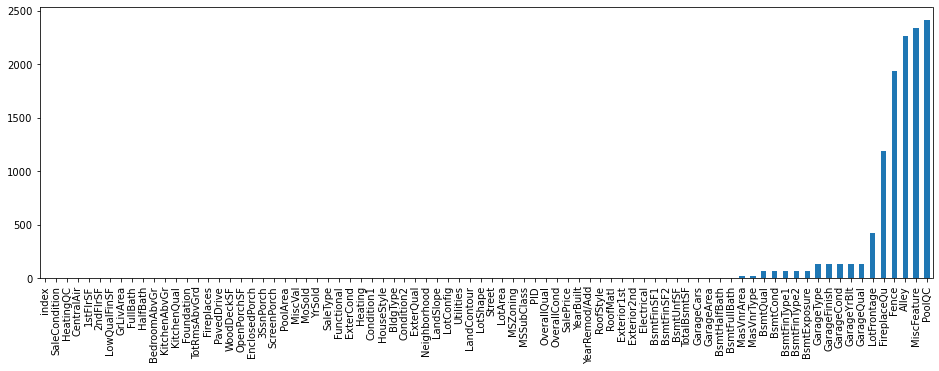

In [19]:
train_df.isnull().sum(axis=0).sort_values().plot(kind='bar', figsize=(16, 5));

Handling of the missing values is  done. However, before looking at individual samples/entries and deciding on if I want to keep, fill or remove them, I would suggest to also decide on the features/columns themselves. It doesn't make sense to keep something like Pool QC  that has 100% of missing values.
Focusing on the nlargest columns with missing values I notice that the first 5 columns have more than 33% of missing values.

In [20]:
#The 5 first columns which have more than 33% of missing values
result1.nlargest(5).index
columns_missing_values=list(result1.nlargest(5).index)
columns_missing_values

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

Here we want to find the 5 first columns which have more than 33% of missing values so To have an idea which columns have the most missing values..

#  Data cleaning for numeric and categorical columns

### The aim is to cretate dataframe without missing values

Before apply request to eliminate missing values, it is necessary to seperate numerical and categorical features. It is importsnt because the solution to handle missing values for categorical or numerical features is not the same!

In [21]:
# Numerical features : features which are not "object":
numeric_train=train_df.select_dtypes(exclude=["object"]).columns
#Target value is "Sale Price" so necessary to eliminate this column in numerial features selection
numeric_train=numeric_train.drop("SalePrice")

In [22]:
train_df_n=train_df[numeric_train]

In [23]:
# Categorical features : features which are  "object":
categoric_train=train_df.select_dtypes(include=["object"]).columns

In [24]:
train_df_c=train_df[categoric_train]

Again here is necessary to apply all the step we did for the test data set!

In [25]:
# Numerical features : features which are not "object":
numeric_pred=pred_df.select_dtypes(exclude=["object"]).columns
#Target value is "Sale Price" is not in the test data set so we don't have to eliminate this column 

In [26]:
pred_df_n=pred_df[numeric_pred]

In [27]:
# Categorical features : features which are  "object":
categoric_pred=pred_df.select_dtypes(include=["object"]).columns

In [28]:
pred_df_c=pred_df[categoric_pred]

In [29]:
#How many missing values I have in numeric columns of my training dataframe?

result2=train_df_n.isnull().sum()
result2

index              0
PID                0
MSSubClass         0
LotFrontage      420
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemod/Add      0
MasVnrArea        20
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      138
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [30]:
result2.nlargest()

LotFrontage     420
GarageYrBlt     138
MasVnrArea       20
BsmtFullBath      2
BsmtHalfBath      2
dtype: int64

In [31]:
#So we can conclude that we have to handle missing values for "LotFrontage","GarageYrBlt","MasVnrArea":
train_df.loc[:, "LotFrontage"] = train_df.loc[:, "LotFrontage"].fillna(0)  
train_df.loc[:, "MasVnrArea"] = train_df.loc[:, "MasVnrArea"].fillna(0) 
#For "GarageYrBlt" is more smart to use median   
train_df.loc[:, "GarageYrBlt"] = train_df.loc[:, "GarageYrBlt"].fillna(train_df['GarageYrBlt'].median())

In [32]:
#Now we focus only on categorical values:
result3=train_df[train_df_c.columns].isnull().sum()
result3

MSZoning            0
Street              0
Alley            2267
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         20
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           71
BsmtCond           71
BsmtExposure       74
BsmtFinType1       71
BsmtFinType2       72
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu      1186
GarageType        136
GarageFinish      138
GarageQual        138
GarageCond        138
PavedDrive          0
PoolQC           2418
Fence            1941
MiscFeature      2340
SaleType            0
SaleCondition       0
dtype: int64

In [33]:
result3.nlargest(15)

PoolQC          2418
MiscFeature     2340
Alley           2267
Fence           1941
FireplaceQu     1186
GarageFinish     138
GarageQual       138
GarageCond       138
GarageType       136
BsmtExposure      74
BsmtFinType2      72
BsmtQual          71
BsmtCond          71
BsmtFinType1      71
MasVnrType        20
dtype: int64

In [34]:
#Here for categorical values we replace Nan values by "No" or "None". We  find more information in the description of the data set giuve us by the autors:
#Features which we can replace Nan by "None":
train_df.loc[:, "Alley"] = train_df.loc[:, "Alley"].fillna("None")
train_df.loc[:, "MasVnrType"] = train_df.loc[:, "MasVnrType"].fillna("None")
#Features which we can replace Nan simply by "No":
train_df.loc[:, "BsmtQual"] = train_df.loc[:, "BsmtQual"].fillna("No")
train_df.loc[:, "BsmtCond"] = train_df.loc[:, "BsmtCond"].fillna("No")
train_df.loc[:, "BsmtExposure"] = train_df.loc[:, "BsmtExposure"].fillna("No")
train_df.loc[:, "BsmtFinType1"] = train_df.loc[:, "BsmtFinType1"].fillna("No")
train_df.loc[:, "BsmtFinType2"] = train_df.loc[:, "BsmtFinType2"].fillna("No")
train_df.loc[:, "Fence"] = train_df.loc[:, "Fence"].fillna("No")
train_df.loc[:, "FireplaceQu"] = train_df.loc[:, "FireplaceQu"].fillna("No")
train_df.loc[:, "GarageType"] = train_df.loc[:, "GarageType"].fillna("No")
train_df.loc[:, "GarageFinish"] = train_df.loc[:, "GarageFinish"].fillna("No")
train_df.loc[:, "GarageQual"] = train_df.loc[:, "GarageQual"].fillna("No")
train_df.loc[:, "GarageCond"] = train_df.loc[:, "GarageCond"].fillna("No")
train_df.loc[:, "MiscFeature"] = train_df.loc[:, "MiscFeature"].fillna("No")
train_df.loc[:, "PoolQC"] = train_df.loc[:, "PoolQC"].fillna("No")

In [35]:
result4=train_df.isnull().sum()
result4.nlargest(15)

BsmtFullBath    2
BsmtHalfBath    2
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Electrical      1
GarageCars      1
GarageArea      1
index           0
PID             0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
dtype: int64

In [36]:
#Last step for handle missing values: drop remaining missing values from our dataset:
train_df.dropna(inplace=True)

In [37]:
result5=train_df.isnull().sum()
result5.nlargest(15)

index           0
PID             0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
dtype: int64

Again is necessary to repeat all this step for test data set!

In [38]:
#How many missing values in numeric columns I have in my test data set?
result6=pred_df[pred_df_n.columns].isnull().sum()
result6

PID               0
MSSubClass        0
LotFrontage      70
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemod/Add     0
MasVnrArea        3
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      21
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
dtype: int64

In [39]:
#So we can conclude that we have to handle missing values for "LotFrontage","GarageYrBlt","MasVnrArea":
pred_df.loc[:, "LotFrontage"] = pred_df.loc[:, "LotFrontage"].fillna(0)  
pred_df.loc[:, "MasVnrArea"] = pred_df.loc[:, "MasVnrArea"].fillna(0) 
#For "GarageYrBlt" is more smart to use median   
pred_df.loc[:, "GarageYrBlt"] = pred_df.loc[:, "GarageYrBlt"].fillna(pred_df['GarageYrBlt'].median())

In [40]:
#How many missing values in categorical columns I have in my test data set?
result7=pred_df[pred_df_c.columns].isnull().sum()
result7

MSZoning           0
Street             0
Alley            465
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         3
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           9
BsmtCond           9
BsmtExposure       9
BsmtFinType1       9
BsmtFinType2       9
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu      236
GarageType        21
GarageFinish      21
GarageQual        21
GarageCond        21
PavedDrive         0
PoolQC           499
Fence            417
MiscFeature      484
SaleType           0
SaleCondition      0
dtype: int64

In [41]:
#Here for categorical values we replace Nan values by "No" or "None". We  find more information in the description of the data set giuve us by the autors:
#Features which we can replace Nan by "None":
pred_df.loc[:, "Alley"] = pred_df.loc[:, "Alley"].fillna("None")
pred_df.loc[:, "MasVnrType"] = pred_df.loc[:, "MasVnrType"].fillna("None")
#Features which we can replace Nan simply by "No":
pred_df.loc[:, "BsmtQual"] = pred_df.loc[:, "BsmtQual"].fillna("No")
pred_df.loc[:, "BsmtCond"] = pred_df.loc[:, "BsmtCond"].fillna("No")
pred_df.loc[:, "BsmtExposure"] = pred_df.loc[:, "BsmtExposure"].fillna("No")
pred_df.loc[:, "BsmtFinType1"] = pred_df.loc[:, "BsmtFinType1"].fillna("No")
pred_df.loc[:, "BsmtFinType2"] = pred_df.loc[:, "BsmtFinType2"].fillna("No")
pred_df.loc[:, "Fence"] = pred_df.loc[:, "Fence"].fillna("No")
pred_df.loc[:, "FireplaceQu"] = pred_df.loc[:, "FireplaceQu"].fillna("No")
pred_df.loc[:, "GarageType"] = pred_df.loc[:, "GarageType"].fillna("No")
pred_df.loc[:, "GarageFinish"] = pred_df.loc[:, "GarageFinish"].fillna("No")
pred_df.loc[:, "GarageQual"] = pred_df.loc[:, "GarageQual"].fillna("No")
pred_df.loc[:, "GarageCond"] = pred_df.loc[:, "GarageCond"].fillna("No")
pred_df.loc[:, "MiscFeature"] = pred_df.loc[:, "MiscFeature"].fillna("No")
pred_df.loc[:, "PoolQC"] = pred_df.loc[:, "PoolQC"].fillna("No")

In [42]:
#Last step for handle missing values: drop remaining missing values from our dataset:
pred_df.dropna(inplace=True)

In [43]:
result8=pred_df.isnull().sum().sort_values().tail(5)
result8

Exterior1st      0
RoofMatl         0
RoofStyle        0
SaleType         0
SaleCondition    0
dtype: int64

## For numerical columns, how does the variable distribution look like? ex. using histograms or scatter/violin/density plots

### We can add graphic visualization for continuous data

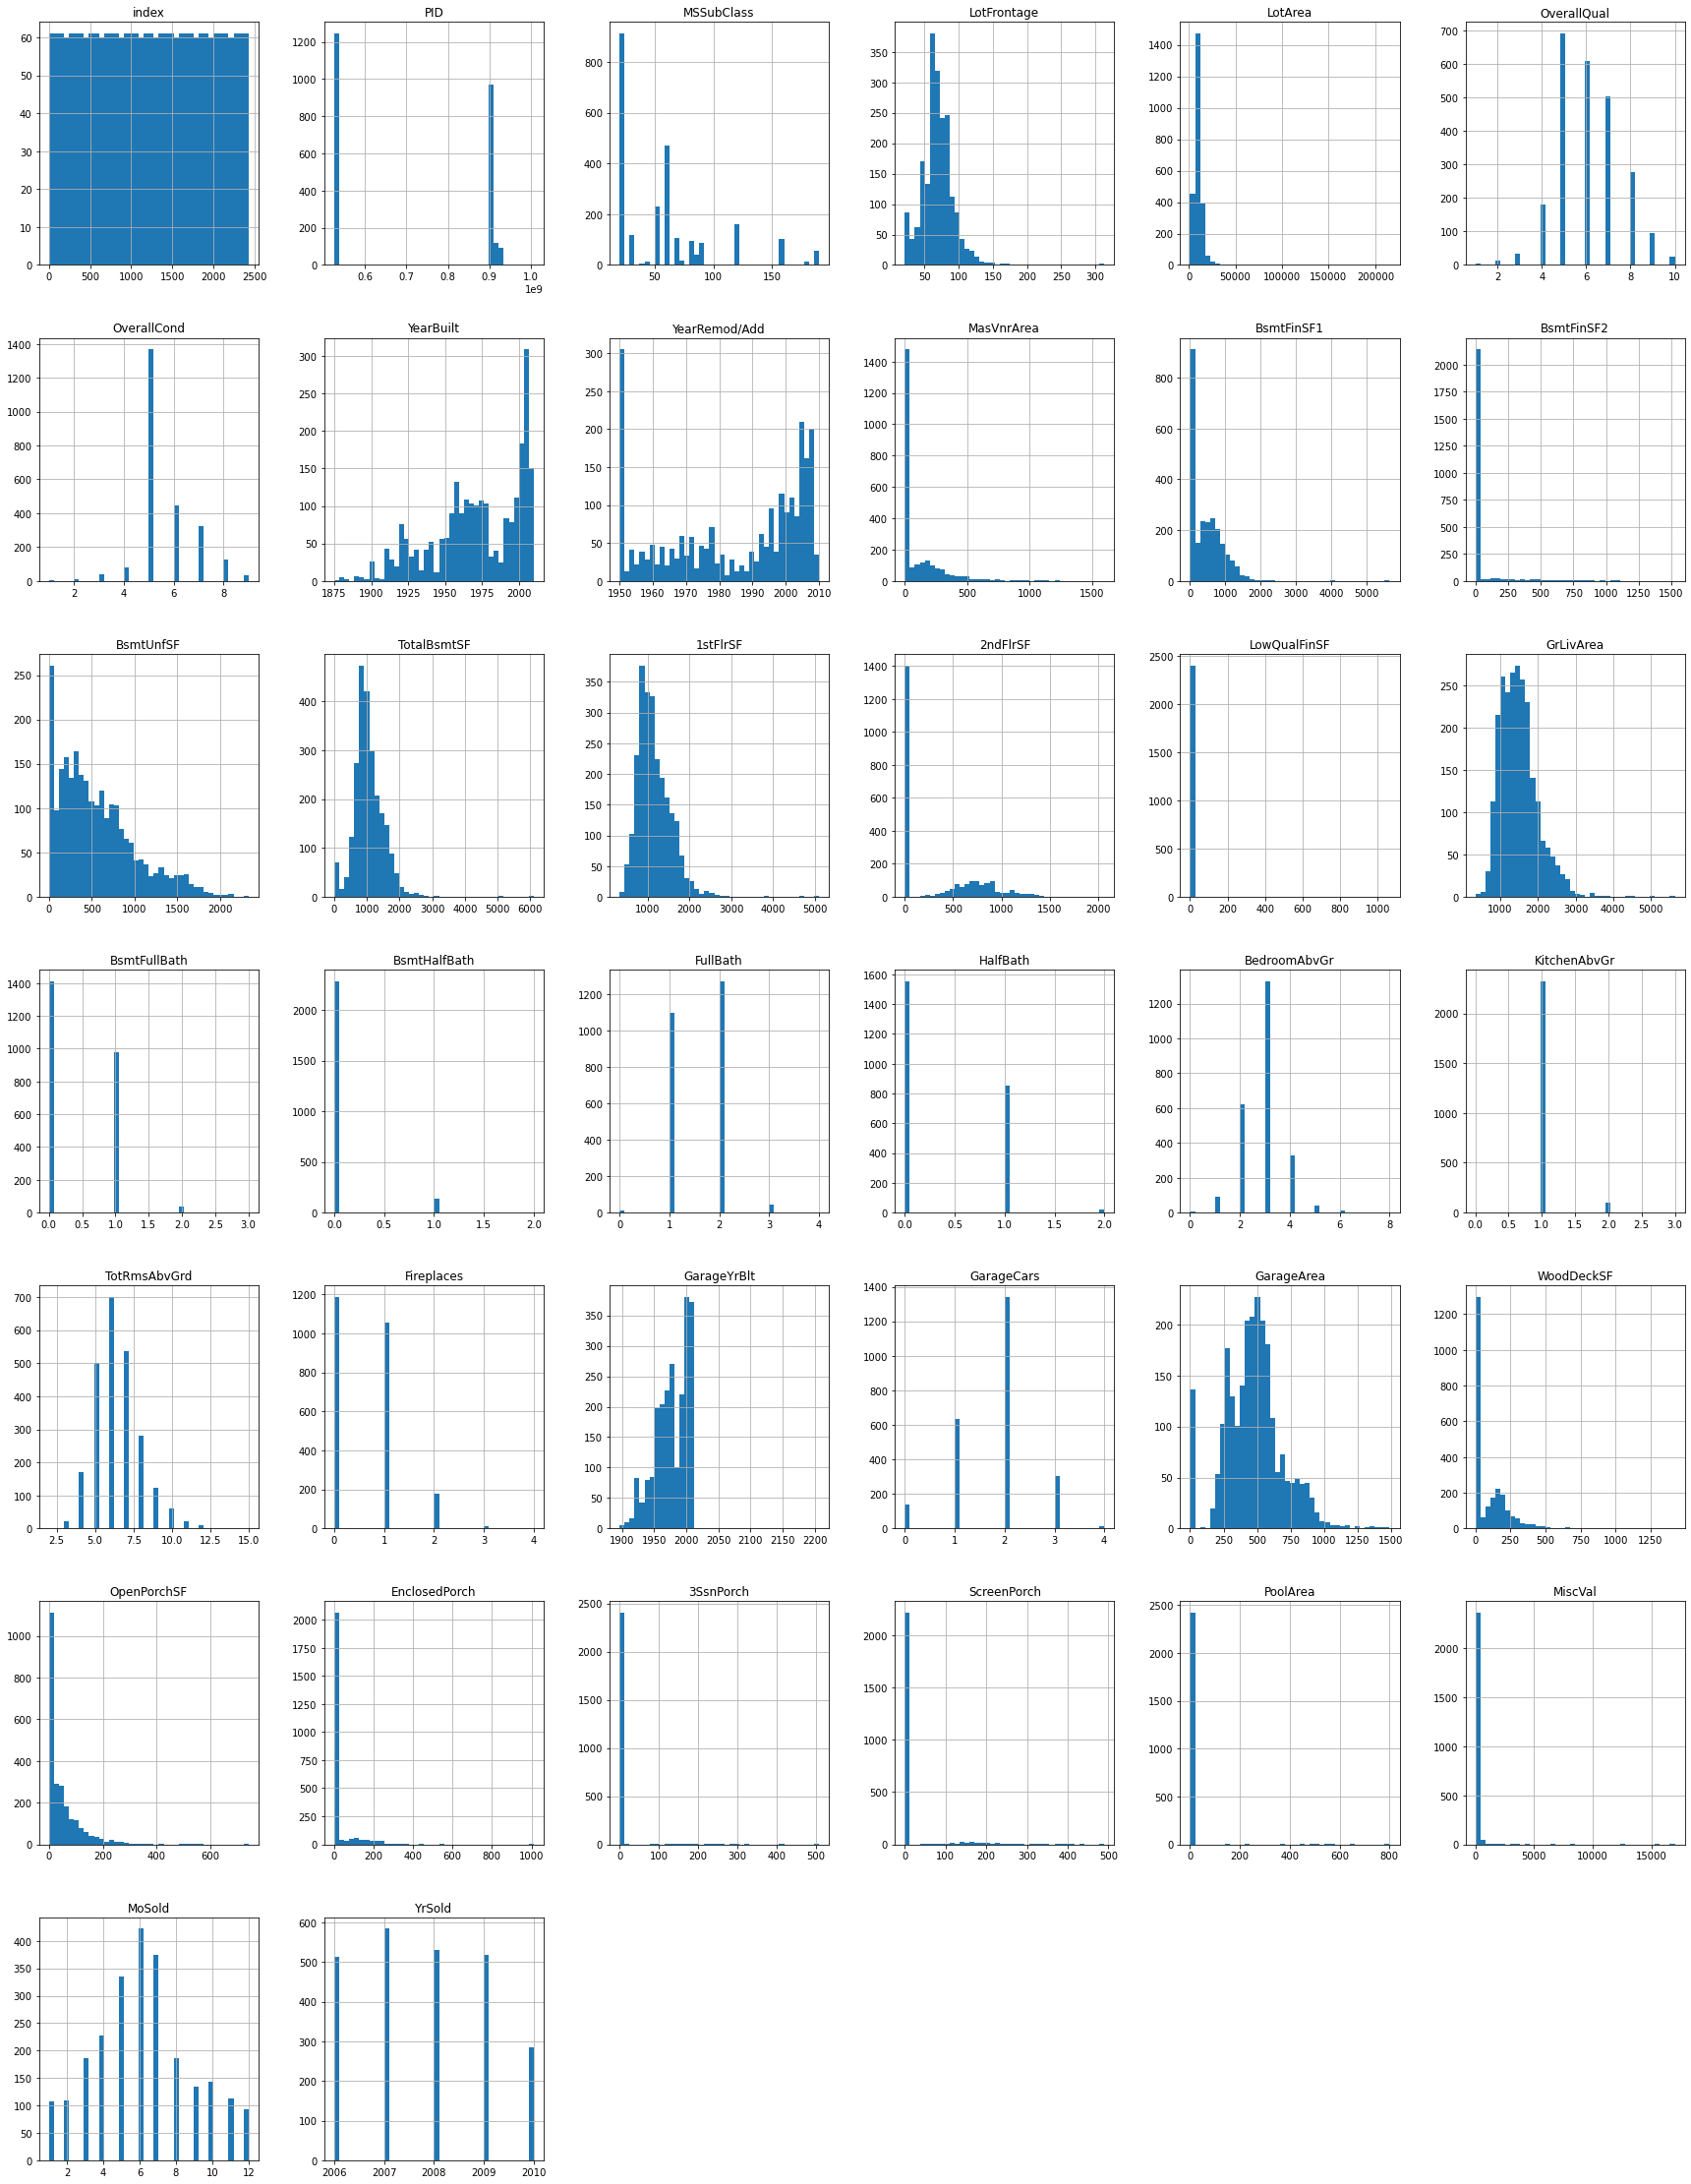

In [44]:
train_df_n.hist(bins=40,figsize=(30,40))
plt.show()

Clearly we can observe that variables "MoSold" and "YrSold" are actually categories!!

We can focus on continuous values :

In [45]:
# Reminder continous variables are the following variables:
continuous_columns=['Lot Frontage','Lot Area','Mas Vnr Area',\
                    'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF',\
                    'Total Bsmt SF','1st Flr SF','2nd Flr SF',\
                    'Gr Liv Area','Low Qual Fin SF','Garage Area',\
                    'Wood Deck SF','Open Porch SF','Enclosed Porch',\
                    '3Ssn Porch','Screen Porch','Pool Area','Misc Val',\
                    'SalePrice'] 

Thanks to the last graphic we can do some observations for continuous variables:

-Lot Area variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Lot Frontage variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable. 

-Mas Vnr Area variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-BsmtFin SF1 variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Bsmt Unf SF 1 variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Bsmt Unf SF 2 variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Total Bsmt SF variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-1st Flr SF variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Gr Liv Area variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Garage Area variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Wood Deck SF variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Open Porch SF variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Enclosed Porch variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-Screen Porch variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

-SalePrice variable has the right tail  longer; the mass of the distribution is concentrated on the left of the figure. It is positive  skewed variable.

We can focus on discrete variables:

-This distribution of "GarageYr Blt" have a negative skewness distribution.

-'Mo Sold' haven't no skewness.Contrary to the other variables which are skewed.
The most popular month is June to buy a house.
The variable "Mo Sold" looks like as a categorical variable !


-"MSSubClass" looks like more as categorical variable.

## What are the mean/min/max/median values of numerical columns?

In [46]:
train_df_n.describe().T

count          mean           std          min           25%  \
index          2430.0  1.214500e+03  7.016249e+02          0.0  6.072500e+02   
PID            2430.0  7.149375e+08  1.887339e+08  526301100.0  5.284770e+08   
MSSubClass     2430.0  5.709259e+01  4.290325e+01         20.0  2.000000e+01   
LotFrontage    2010.0  6.920199e+01  2.348699e+01         21.0  5.800000e+01   
LotArea        2430.0  1.024356e+04  8.353925e+03       1470.0  7.482000e+03   
OverallQual    2430.0  6.088889e+00  1.414621e+00          1.0  5.000000e+00   
OverallCond    2430.0  5.569959e+00  1.116442e+00          1.0  5.000000e+00   
YearBuilt      2430.0  1.971167e+03  3.020793e+01       1875.0  1.954000e+03   
YearRemod/Add  2430.0  1.984239e+03  2.075116e+01       1950.0  1.966000e+03   
MasVnrArea     2410.0  1.019954e+02  1.766117e+02          0.0  0.000000e+00   
BsmtFinSF1     2429.0  4.439444e+02  4.574536e+02          0.0  0.000000e+00   
BsmtFinSF2     2429.0  5.107369e+01  1.721435e+02          0.0  0.000000e+00   
BsmtUnfSF      2429.0  5.564809e+02  4.396501e+02          0.0  2.160000e+02   
TotalBsmtSF    2429.0  1.051499e+03  4.446900e+02          0.0  7.940000e+02   
1stFlrSF       2430.0  1.159845e+03  3.930976e+02        334.0  8.805000e+02   
2ndFlrSF       2430.0  3.266728e+02  4.194908e+02          0.0  0.000000e+00   
LowQualFinSF   2430.0  4.586831e+00  4.721618e+01          0.0  0.000000e+00   
GrLivArea      2430.0  1.491105e+03  4.961783e+02        334.0  1.120000e+03   
BsmtFullBath   2428.0  4.341021e-01  5.279405e-01          0.0  0.000000e+00   
BsmtHalfBath   2428.0  6.013180e-02  2.429227e-01          0.0  0.000000e+00   
FullBath       2430.0  1.560905e+00  5.483934e-01          0.0  1.000000e+00   
HalfBath       2430.0  3.695473e-01  5.011910e-01          0.0  0.000000e+00   
BedroomAbvGr   2430.0  2.842798e+00  8.176594e-01          0.0  2.000000e+00   
KitchenAbvGr   2430.0  1.042798e+00  2.084554e-01          0.0  1.000000e+00   
TotRmsAbvGrd   2430.0  6.409053e+00  1.551557e+00          2.0  5.000000e+00   
Fireplaces     2430.0  5.950617e-01  6.465988e-01          0.0  0.000000e+00   
GarageYrBlt    2292.0  1.977861e+03  2.554487e+01       1896.0  1.960000e+03   
GarageCars     2429.0  1.762454e+00  7.582429e-01          0.0  1.000000e+00   
GarageArea     2429.0  4.719794e+02  2.157535e+02          0.0  3.240000e+02   
WoodDeckSF     2430.0  9.391770e+01  1.281069e+02          0.0  0.000000e+00   
OpenPorchSF    2430.0  4.709177e+01  6.712385e+01          0.0  0.000000e+00   
EnclosedPorch  2430.0  2.229465e+01  6.238641e+01          0.0  0.000000e+00   
3SsnPorch      2430.0  2.471605e+00  2.488024e+01          0.0  0.000000e+00   
ScreenPorch    2430.0  1.652922e+01  5.682223e+01          0.0  0.000000e+00   
PoolArea       2430.0  2.401235e+00  3.611199e+01          0.0  0.000000e+00   
MiscVal        2430.0  5.617984e+01  6.166615e+02          0.0  0.000000e+00   
MoSold         2430.0  6.209465e+00  2.721942e+00          1.0  4.000000e+00   
YrSold         2430.0  2.007784e+03  1.311843e+00       2006.0  2.007000e+03   

                       50%           75%           max  
index               1214.5  1.821750e+03  2.429000e+03  
PID            535454055.0  9.071352e+08  1.007100e+09  
MSSubClass            50.0  7.000000e+01  1.900000e+02  
LotFrontage           68.0  8.000000e+01  3.130000e+02  
LotArea             9500.0  1.160450e+04  2.152450e+05  
OverallQual            6.0  7.000000e+00  1.000000e+01  
OverallCond            5.0  6.000000e+00  9.000000e+00  
YearBuilt           1973.0  2.000000e+03  2.010000e+03  
YearRemod/Add       1993.0  2.003000e+03  2.010000e+03  
MasVnrArea             0.0  1.647500e+02  1.600000e+03  
BsmtFinSF1           375.0  7.370000e+02  5.644000e+03  
BsmtFinSF2             0.0  0.000000e+00  1.526000e+03  
BsmtUnfSF            462.0  7.990000e+02  2.336000e+03  
TotalBsmtSF          990.0  1.299000e+03  6.110000e+03  
1stFlrSF            1086.0  1.387750e+03

In [47]:
pred_df_n.describe().T

count          mean           std          min           25%  \
PID            500.0  7.121658e+08  1.888879e+08  526351030.0  5.284576e+08   
MSSubClass     500.0  5.882000e+01  4.133673e+01         20.0  2.000000e+01   
LotFrontage    430.0  6.933023e+01  2.281460e+01         21.0  5.900000e+01   
LotArea        500.0  9.683132e+03  4.950630e+03       1300.0  7.329000e+03   
OverallQual    500.0  6.124000e+00  1.394458e+00          2.0  5.000000e+00   
OverallCond    500.0  5.530000e+00  1.087873e+00          1.0  5.000000e+00   
YearBuilt      500.0  1.972274e+03  3.044030e+01       1872.0  1.953000e+03   
YearRemod/Add  500.0  1.984402e+03  2.140338e+01       1950.0  1.964000e+03   
MasVnrArea     497.0  1.014185e+02  1.909622e+02          0.0  0.000000e+00   
BsmtFinSF1     500.0  4.362420e+02  4.468265e+02          0.0  0.000000e+00   
BsmtFinSF2     500.0  4.315800e+01  1.538912e+02          0.0  0.000000e+00   
BsmtUnfSF      500.0  5.727760e+02  4.389241e+02          0.0  2.427500e+02   
TotalBsmtSF    500.0  1.052176e+03  4.206862e+02          0.0  7.840000e+02   
1stFlrSF       500.0  1.158160e+03  3.863584e+02        494.0  8.640000e+02   
2ndFlrSF       500.0  3.781420e+02  4.673784e+02          0.0  0.000000e+00   
LowQualFinSF   500.0  5.114000e+00  4.167030e+01          0.0  0.000000e+00   
GrLivArea      500.0  1.541416e+03  5.472142e+02        540.0  1.173500e+03   
BsmtFullBath   500.0  4.180000e-01  5.097015e-01          0.0  0.000000e+00   
BsmtHalfBath   500.0  6.600000e-02  2.564674e-01          0.0  0.000000e+00   
FullBath       500.0  1.594000e+00  5.743027e-01          0.0  1.000000e+00   
HalfBath       500.0  4.280000e-01  5.072777e-01          0.0  0.000000e+00   
BedroomAbvGr   500.0  2.910000e+00  8.737430e-01          1.0  2.000000e+00   
KitchenAbvGr   500.0  1.052000e+00  2.396056e-01          0.0  1.000000e+00   
TotRmsAbvGrd   500.0  6.608000e+00  1.664896e+00          3.0  6.000000e+00   
Fireplaces     500.0  6.200000e-01  6.545662e-01          0.0  0.000000e+00   
GarageYrBlt    479.0  1.979430e+03  2.543609e+01       1895.0  1.960000e+03   
GarageCars     500.0  1.788000e+00  7.721713e-01          0.0  1.000000e+00   
GarageArea     500.0  4.769020e+02  2.117443e+02          0.0  3.127500e+02   
WoodDeckSF     500.0  9.294600e+01  1.176286e+02          0.0  0.000000e+00   
OpenPorchSF    500.0  4.968000e+01  6.923265e+01          0.0  0.000000e+00   
EnclosedPorch  500.0  2.649600e+01  7.201969e+01          0.0  0.000000e+00   
3SsnPorch      500.0  3.180000e+00  2.639145e+01          0.0  0.000000e+00   
ScreenPorch    500.0  1.344000e+01  5.234767e+01          0.0  0.000000e+00   
PoolArea       500.0  1.476000e+00  3.300436e+01          0.0  0.000000e+00   
MiscVal        500.0  2.368800e+01  1.753751e+02          0.0  0.000000e+00   
MoSold         500.0  6.248000e+00  2.680460e+00          1.0  4.000000e+00   
YrSold         500.0  2.007824e+03  1.340380e+00       2006.0  2.007000e+03   

                       50%           75%          max  
PID            535453170.0  9.072555e+08  923277080.0  
MSSubClass            60.0  7.500000e+01        190.0  
LotFrontage           69.0  8.000000e+01        153.0  
LotArea             9150.5  1.131275e+04      53504.0  
OverallQual            6.0  7.000000e+00         10.0  
OverallCond            5.0  6.000000e+00          9.0  
YearBuilt           1975.0  2.001250e+03       2010.0  
YearRemod/Add       1994.0  2.004000e+03       2010.0  
MasVnrArea             0.0  1.480000e+02       1378.0  
BsmtFinSF1           342.5  7.062500e+02       2260.0  
BsmtFinSF2             0.0  0.000000e+00       1474.0  
BsmtUnfSF            478.0  8.115000e+02       1969.0  
TotalBsmtSF          990.0  1.303000e+03       3200.0  
1stFlrSF            1077.5  1.382250e+03       3228.0  
2ndFlrSF               0.0  7.312500e+02       1796.0  
LowQualFinSF           0.0  0.000000e+00        514.0  
GrLivArea           1454.5  1.769500e+03       4676.0  
Bsmt

# Feature encoding

In [48]:
#We note that we have features as "MSSubClass" and "MoSold" are more categorical:
train_df = train_df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [49]:
# Encode some categorical features as ordered numbers when there is information in the order
train_df = train_df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})

In the lessons we learn that we can create new features by combinations of existing features or by silplications of existing features.

When we do simplification we can use only two values(1,2) to simplify several values (1,2,3,4).

For the combinations we can have a global quality for some features as "OverallGrade" or "GarageGrade", for example.


In [50]:
# Simplifications of existing features
train_df["SimplOverallQual"] = train_df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 
                                                       4 : 2, 5 : 2, 6 : 2, 
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 
                                                      })
train_df["SimplOverallCond"] = train_df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 
                                                       4 : 2, 5 : 2, 6 : 2, 
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 
                                                      })
train_df["SimplPoolQC"] = train_df.PoolQC.replace({1 : 1, 2 : 1, 
                                             3 : 2, 4 : 2 
                                            })
train_df["SimplGarageCond"] = train_df.GarageCond.replace({1 : 1, 
                                                     2 : 1, 3 : 1, 
                                                     4 : 2, 5 : 2 
                                                    })
train_df["SimplGarageQual"] = train_df.GarageQual.replace({1 : 1, 
                                                     2 : 1, 3 : 1, 
                                                     4 : 2, 5 : 2 
                                                    })

In [51]:
#Combinations of existing features
# Overall quality of the house
train_df["OverallGrade"] = train_df["OverallQual"] * train_df["OverallCond"]
# Overall quality of the garage
train_df["GarageGrade"] = train_df["GarageQual"] * train_df["GarageCond"]

Again we have to do one hot encoding for the test data set!

In [52]:
#We note that we have features as "MSSubClass" and "MoSold" are more categorical:
pred_df = pred_df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [53]:
# Encode some categorical features as ordered numbers when there is information in the order
pred_df = pred_df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}})

In [54]:
# Simplifications of existing features
pred_df["SimplOverallQual"] = pred_df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1,
                                                       4 : 2, 5 : 2, 6 : 2, 
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 
                                                      })
pred_df["SimplOverallCond"] = pred_df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 
                                                       4 : 2, 5 : 2, 6 : 2, 
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 
                                                      })
pred_df["SimplPoolQC"] = pred_df.PoolQC.replace({1 : 1, 2 : 1, 
                                             3 : 2, 4 : 2 
                                            })
pred_df["SimplGarageCond"] = pred_df.GarageCond.replace({1 : 1, 
                                                     2 : 1, 3 : 1, 
                                                     4 : 2, 5 : 2 
                                                    })
pred_df["SimplGarageQual"] = pred_df.GarageQual.replace({1 : 1, 
                                                     2 : 1, 3 : 1, 
                                                     4 : 2, 5 : 2 
                                                    })

In [55]:
#Combinations of existing features
# Overall quality of the house
pred_df["OverallGrade"] = pred_df["OverallQual"] * pred_df["OverallCond"]
# Overall quality of the garage
pred_df["GarageGrade"] = pred_df["GarageQual"] * pred_df["GarageCond"]

In [56]:
#Now check if we have skewed features for allnumerical variables (not only continuous variasbles):
s_c = train_df_n.columns[abs(train_df_n.skew()) > 1.7]
s_c

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath',
       'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

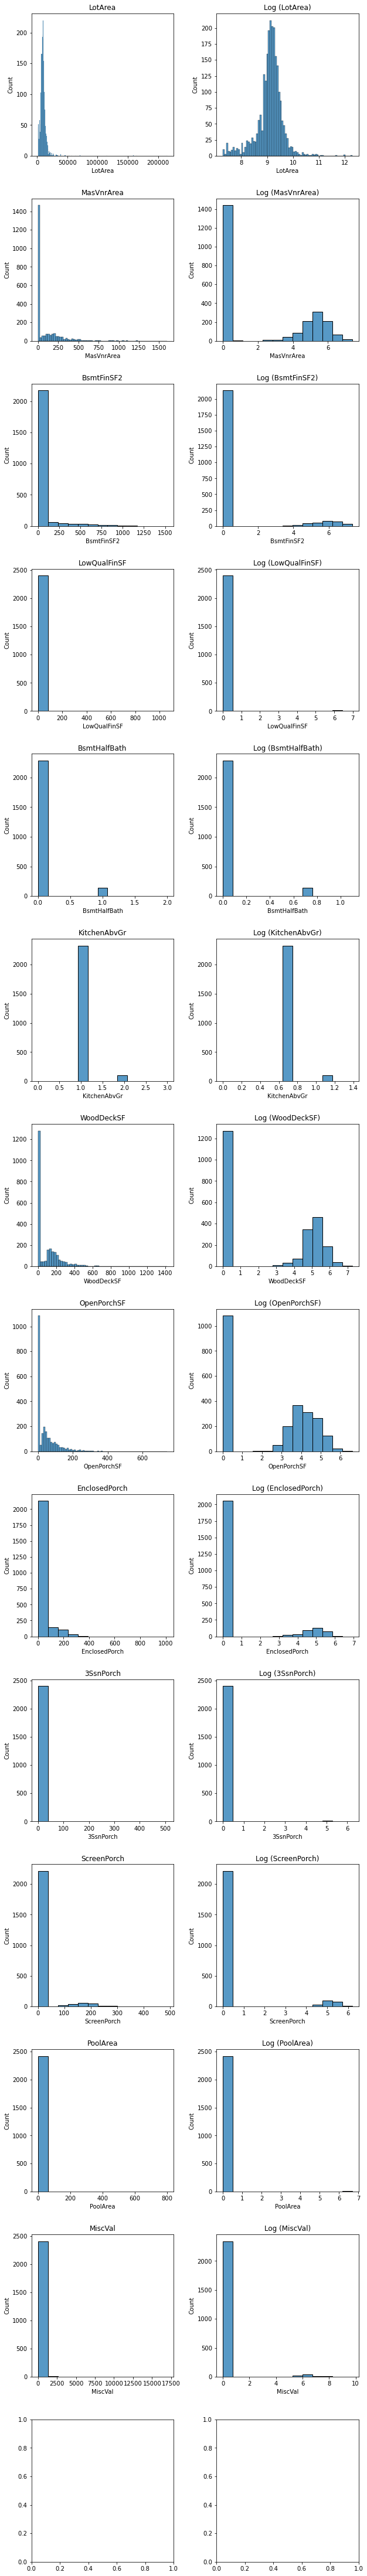

In [57]:
# plots of the continuous columns, before and after transformation. 

fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(10, 80), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})

for col in range(0, len(s_c)):

    # 1st columns (for P_skewed_values): Before log
    sns.histplot(train_df_n[s_c[col]],  ax = axes[col, 0])
    axes[col, 0].set_title(s_c[col]);

       
    # 2st columns: After log  
    sns.histplot(np.log1p(train_df_n[s_c[col]]),  ax = axes[col, 1])
    axes[col, 1].set_title('Log (' + s_c[col] + ')');

In [58]:
#After ifdentification of skewed features we have to transform all of them!
train_df[s_c[:-1]] = np.log1p(train_df[s_c[:-1]])
pred_df[s_c[:-1]] = np.log1p(pred_df[s_c[:-1]])

### Explore the relations between features and the sale prices. e.g how the 'sale price' and 'Lot area' are related to each ohter?

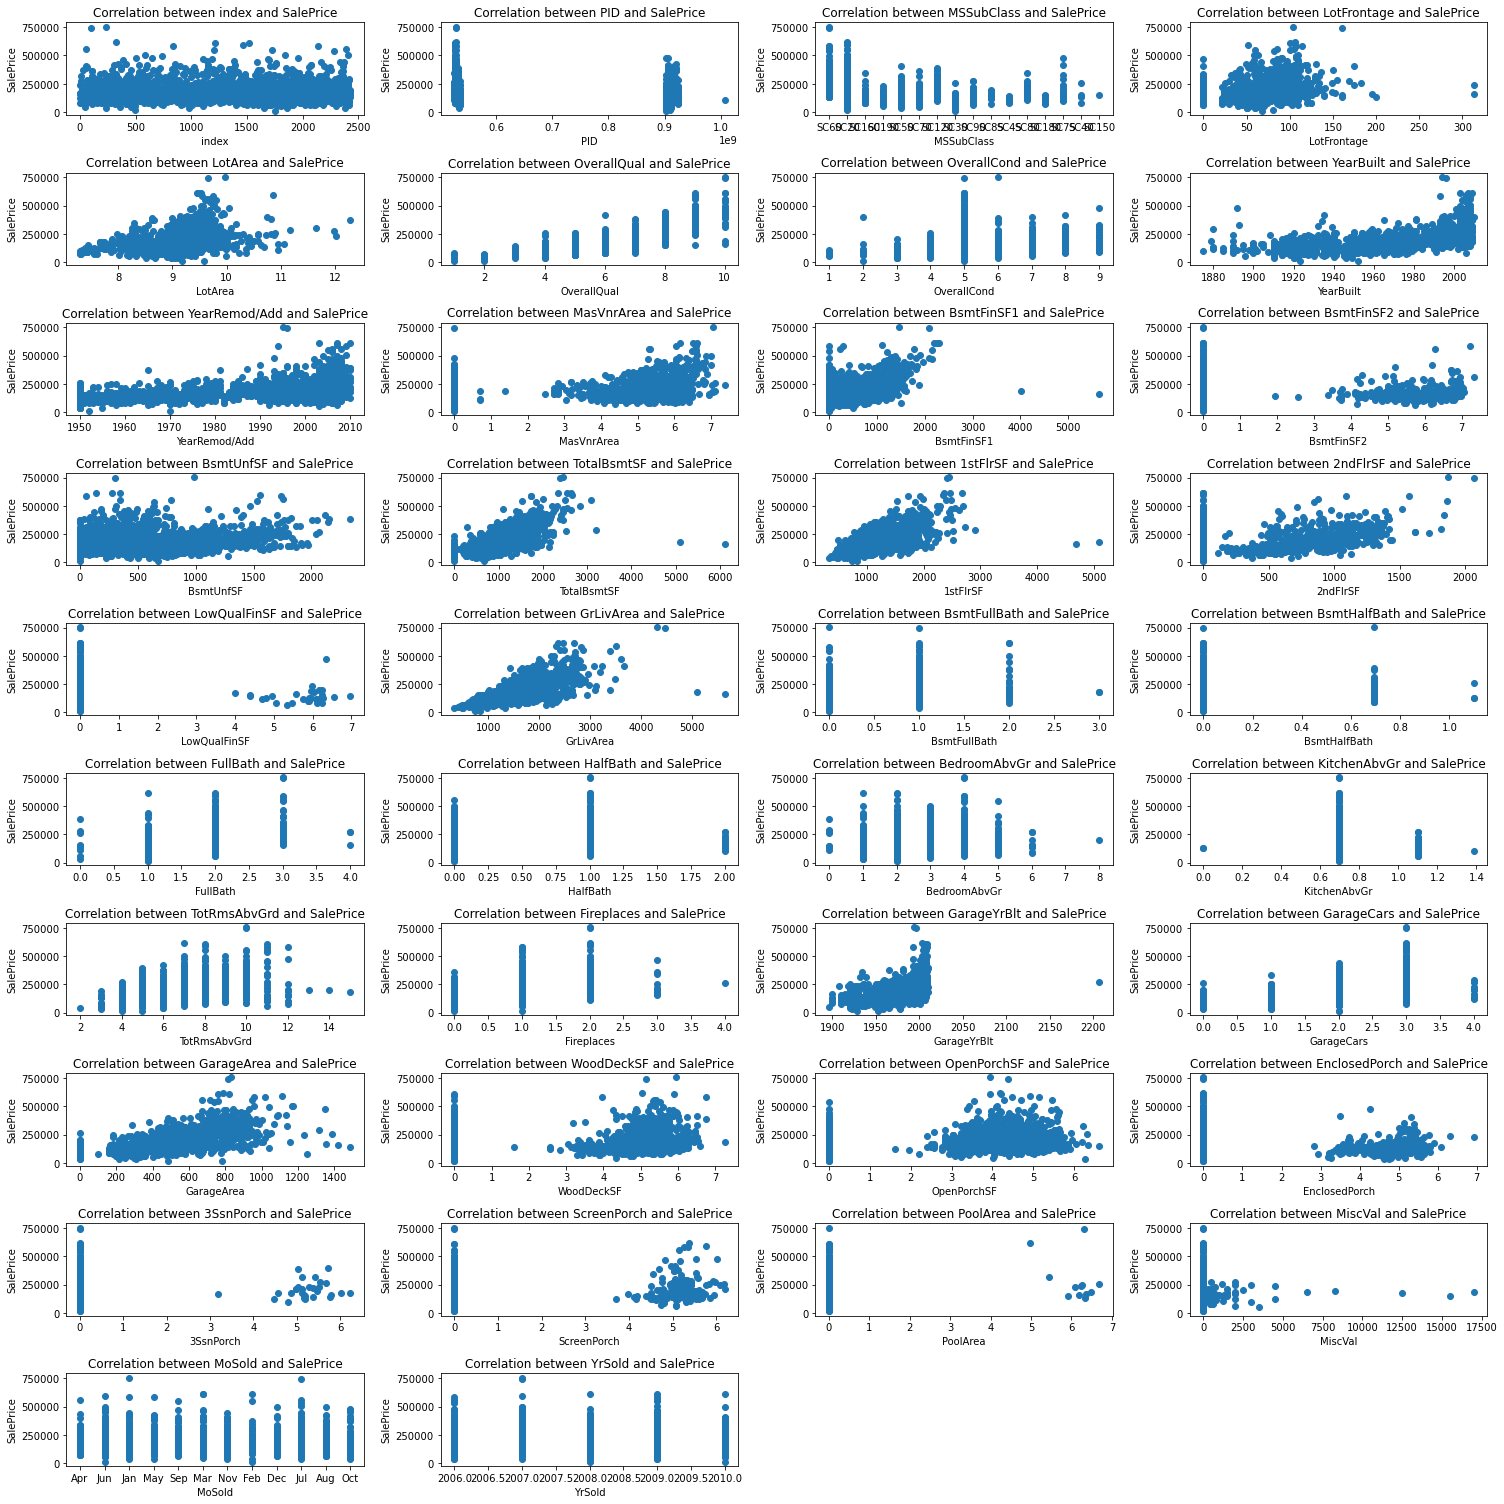

In [59]:
figure = plt.figure(figsize = (21, 21))
for (i,f) in enumerate(train_df_n.columns):
    plt.subplot(10,4,i+1)
    plt.scatter(train_df[f].tolist(),train_df['SalePrice'].tolist())
    plt.title('Correlation between {} and SalePrice'.format(f))
    plt.xlabel(f)
    plt.ylabel("SalePrice")
    plt.tight_layout()
plt.show()

Thanks to plot function we can visualize the mean, min, max and median values for numerical columns.


# .In-depth analysis:Finding correlations

In [60]:
print("Find most important features relative to target SalePrice")
train_corr = train_df.corr()
train_corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(train_corr.SalePrice)

Find most important features relative to target SalePrice
SalePrice           1.000000
OverallQual         0.799727
GrLivArea           0.701044
ExterQual           0.699948
KitchenQual         0.670468
SimplOverallQual    0.662882
GarageCars          0.643398
TotalBsmtSF         0.637747
GarageArea          0.630557
1stFlrSF            0.628361
BsmtQual            0.607143
OverallGrade        0.560615
YearBuilt           0.560388
FireplaceQu         0.547490
FullBath            0.536241
YearRemod/Add       0.528150
GarageYrBlt         0.513489
Fireplaces          0.491289
TotRmsAbvGrd        0.482935
HeatingQC           0.448586
MasVnrArea          0.448270
BsmtFinSF1          0.440432
OpenPorchSF         0.428902
BsmtExposure        0.404795
LotArea             0.357824
BsmtFinType1        0.348122
WoodDeckSF          0.329719
GarageGrade         0.295939
GarageQual          0.282830
PavedDrive          0.280380
HalfBath            0.279179
BsmtFullBath        0.278453
GarageCond    

## Graphic to visualise correlation

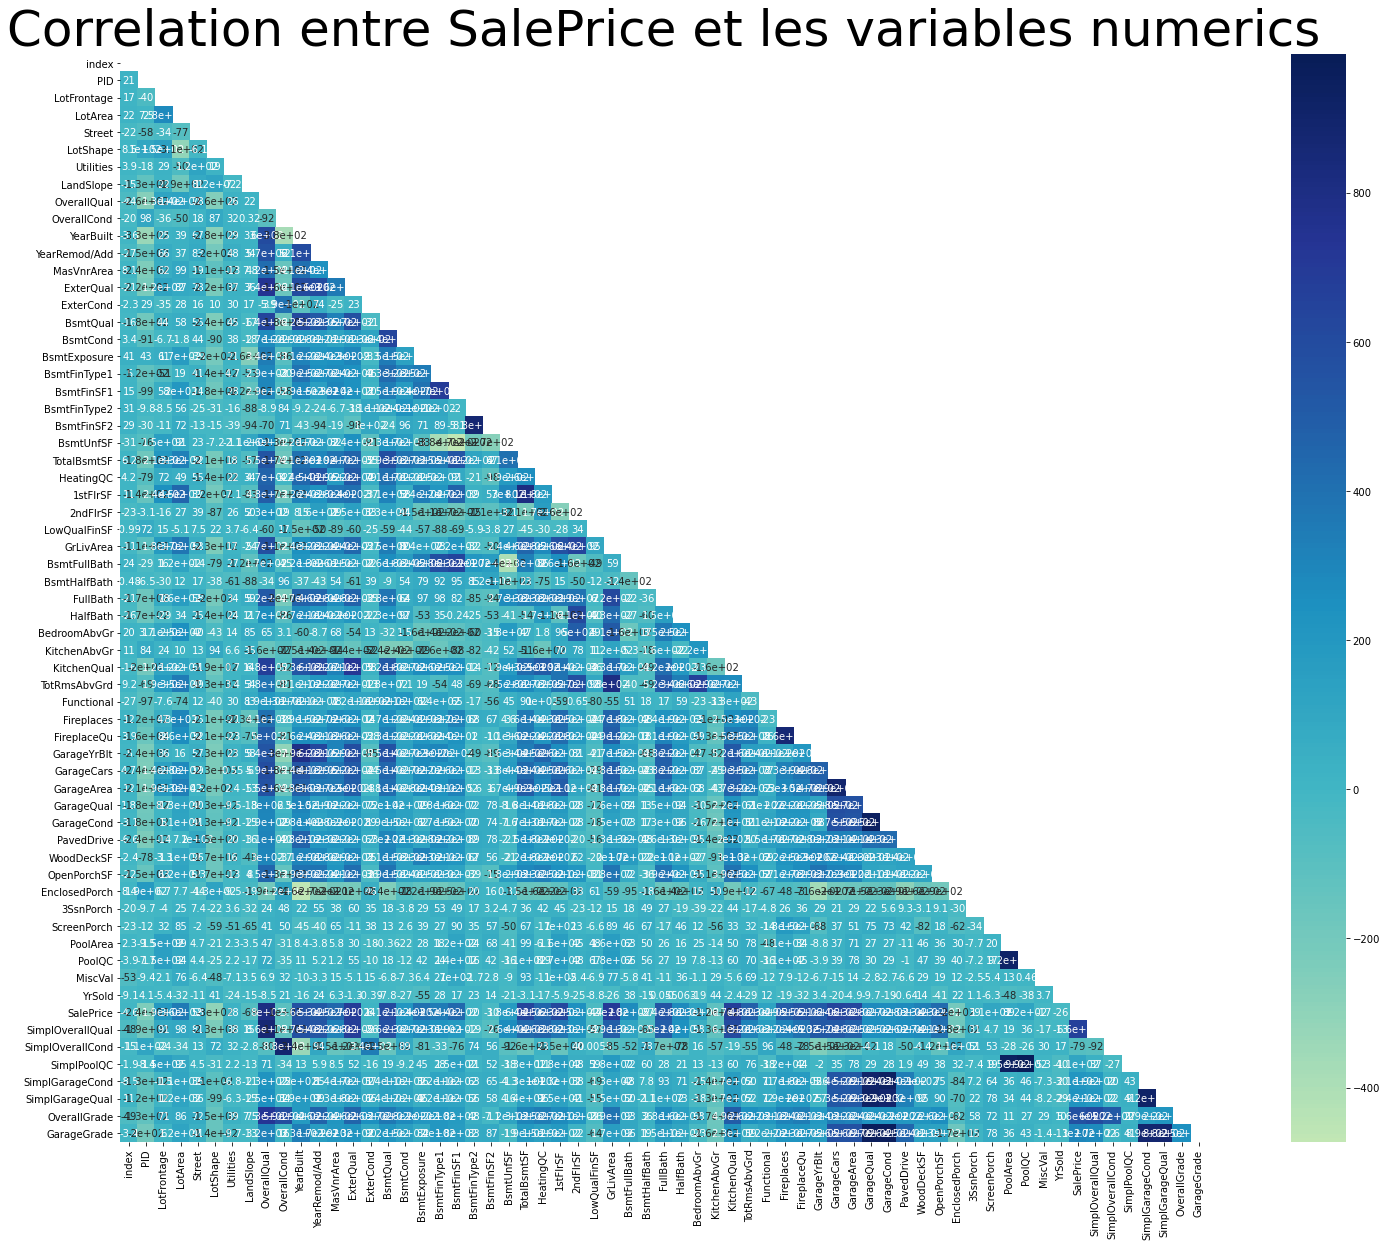

In [61]:
f = plt.figure(figsize=(30, 20))

# More easy to use a mask than all the matrix (taken from seaborn example gallery)
mask = np.zeros_like(train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Correlation entre SalePrice et les variables numerics', fontsize=50)
sns.heatmap(1000*train_df.corr(),cmap="YlGnBu" ,mask=mask,center=0.20, annot=True, square=True,);

plt.show()
#Add figsize google it how to improve figsize of seaborn heatmap

Unfortunately we have multicollinearity ! For several features multicollinearity exist.

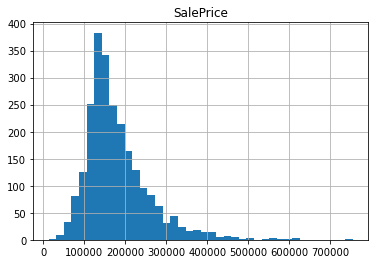

In [62]:
train_df.hist(column='SalePrice',bins=40)
plt.show()

We can observe that the majority of houses have a price between 100 and 400k$.

Unfortunately we have extreme values, so some houses have an expensive price (above the interval we mention).

So this extreme values can lead to biased models and increase percentage of error between data set.

Logarithm transformation is important to avoid a biased model!

We can apply the logarithm transformation and use a model which predict the logarithm of the sale Price.

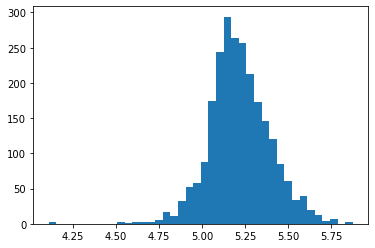

In [63]:
plt.hist(np.log10(train_df.SalePrice), bins=40)
plt.show()

## Preprocess function to perform step: encoding non-numerical entries with one-hot encoding 

In [64]:
#We use one-hot encoding to create dummy-variables for all the categorial non-ordinal variables here we use median value
train_df = pd.get_dummies(train_df)
for col in train_df.columns:
    train_df[col] = train_df[col].fillna(train_df[col].median())

In [65]:
# Be careful we have multicollinearity as we see in the last cell we have to eliminate it 
pred_df = pd.get_dummies(pred_df, drop_first=True)

In [66]:
pd.isnull(train_df).sum().head(20)

index            0
PID              0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
Utilities        0
LandSlope        0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemod/Add    0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
dtype: int64

In [67]:
train_df.set_index('SalePrice', inplace=True)

In [68]:
train_df.head() 

index        PID  LotFrontage   LotArea  Street  LotShape  \
SalePrice                                                              
236000         0  528275070          0.0  9.082052       2         3   
155000         1  535305120         75.0  9.227296       2         4   
75000          2  923228250         21.0  7.601902       2         4   
165500         3  535152150         70.0  9.264165       2         3   
122000         4  903475060         60.0  9.222368       2         3   

           Utilities  LandSlope  OverallQual  OverallCond  YearBuilt  \
SalePrice                                                              
236000             4          3            7            5       2000   
155000             4          3            6            6       1951   
75000              4          3            4            5       1970   
165500             4          3            5            5       1959   
122000             4          3            7            4       1910   

           YearRemod/Add  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
SalePrice                                                              
236000              2000    0.000000          4          3         4   
155000              1951    6.259581          3          3         3   
75000               1970    4.394449          3          3         3   
165500              1959    0.000000          3          3         3   
122000              1950    0.000000          2          3         3   

           BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
SalePrice                                                                   
236000            3             0             6       300.0             1   
155000            3             0             1         0.0             1   
75000             3             0             1         0.0             1   
165500            3             0             3      1018.0             1   
122000            3             0             1         0.0             1   

           BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  \
SalePrice                                                                      
236000            0.0      652.0        952.0          5       980      1276   
155000            0.0      216.0        216.0          3      1575         0   
75000             0.0      546.0        546.0          2       546       546   
165500            0.0      380.0       1398.0          4      1700         0   
122000            0.0      925.0        925.0          3       964       925   

           LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
SalePrice                                                                  
236000              0.0       2256           0.0      0.000000         2   
155000              0.0       1575           0.0      0.000000         1   
75000               0.0       1092           0.0      0.000000         1   
165500              0.0       1700           0.0      0.693147         1   
122000              0.0       1889           0.0      0.000000         1   

           HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
SalePrice                                                                    
236000            1             4      0.693147            4             8   
155000            1             2      0.693147            4             5   
75000             1             3      0.693147            3             6   
165500            1             4      0.693147            4             6   
122000            1             4      1.098612            3             9   

           Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageCars  \
SalePrice                                                                 
236000              8           1            3       2000.0         2.0   
155000              8           1            4       1951.0         2.0   
75000          

In [69]:
pred_df.describe().T

count          mean           std           min  \
PID                    500.0  7.121658e+08  1.888879e+08  5.263510e+08   
LotFrontage            500.0  5.962400e+01  3.205267e+01  0.000000e+00   
LotArea                500.0  9.063786e+00  5.045910e-01  7.170888e+00   
Street                 500.0  1.998000e+00  4.472136e-02  1.000000e+00   
LotShape               500.0  3.662000e+00  5.369662e-01  1.000000e+00   
...                      ...           ...           ...           ...   
SaleCondition_AdjLand  500.0  4.000000e-03  6.318215e-02  0.000000e+00   
SaleCondition_Alloca   500.0  8.000000e-03  8.917345e-02  0.000000e+00   
SaleCondition_Family   500.0  2.800000e-02  1.651379e-01  0.000000e+00   
SaleCondition_Normal   500.0  7.820000e-01  4.133009e-01  0.000000e+00   
SaleCondition_Partial  500.0  1.060000e-01  3.081459e-01  0.000000e+00   

                                25%           50%           75%           max  
PID                    5.284576e+08  5.354532e+08  9.072555e+08  9.232771e+08  
LotFrontage            4.800000e+01  6.500000e+01  7.900000e+01  1.530000e+02  
LotArea                8.899727e+00  9.121673e+00  9.333773e+00  1.088753e+01  
Street                 2.000000e+00  2.000000e+00  2.000000e+00  2.000000e+00  
LotShape               3.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00  
...                             ...           ...           ...           ...  
SaleCondition_AdjLand  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
SaleCondition_Alloca   0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
SaleCondition_Family   0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
SaleCondition_Normal   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
SaleCondition_Partial  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  

[216 rows x 8 columns]

In [70]:
# We find that variables are not present in our training dataset as :'PoolQC_3', 'RoofMatl_Roll', 'Exterior2nd_Other', 'ExterCond_4', 'ExterCond_3'
#We have to drop all of them
#pred_df.drop(columns=['PoolQC_3', 'RoofMatl_Roll', 'Exterior2nd_Other', 'ExterCond_4', 'ExterCond_3'], inplace=True)
pred_df.drop(columns=['Exterior2nd_Other', 'RoofMatl_Roll'], inplace=True)


In [71]:
# We reduce our training dataset to the variables that are available in our prediction data
train_df =  train_df[pred_df.columns]

In [72]:
train_df.reset_index(inplace=True)

In [73]:
train_df.shape , pred_df.shape

((2426, 215), (500, 214))

## Presence of outliers ?

The aim is to check if we have outliers or not?

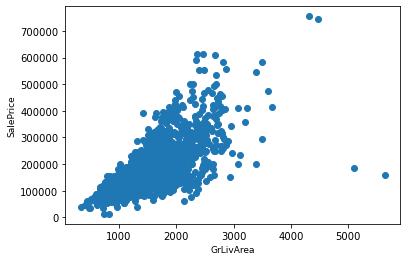

In [74]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=9)
plt.xlabel('GrLivArea', fontsize=9)
plt.show()

Clearly we have 4 odd values after the threshold=4000.

I decided to  eliminate outliers in the modelling part.

# D Model fitting

## Define apropriate baseline

##### We see in the lecture different types of baseline...

In [75]:
def MAE(y,y_pred):
    return np.mean(np.abs(y-y_pred))

In [76]:
def MSE(y,y_pred):
    return np.mean(np.square(y-y_pred))

In [77]:
def RMSE(y, y_pred):
    mse = np.mean(np.square(y - y_pred)) 
    return np.sqrt(mse)

## Let use a global view of correlated features

In [78]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt', 'MiscVal', 'EnclosedPorch', 'LotArea', 'LotFrontage', 'GarageYrBlt', 'OpenPorchSF', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF2', 'BsmtFinSF1']

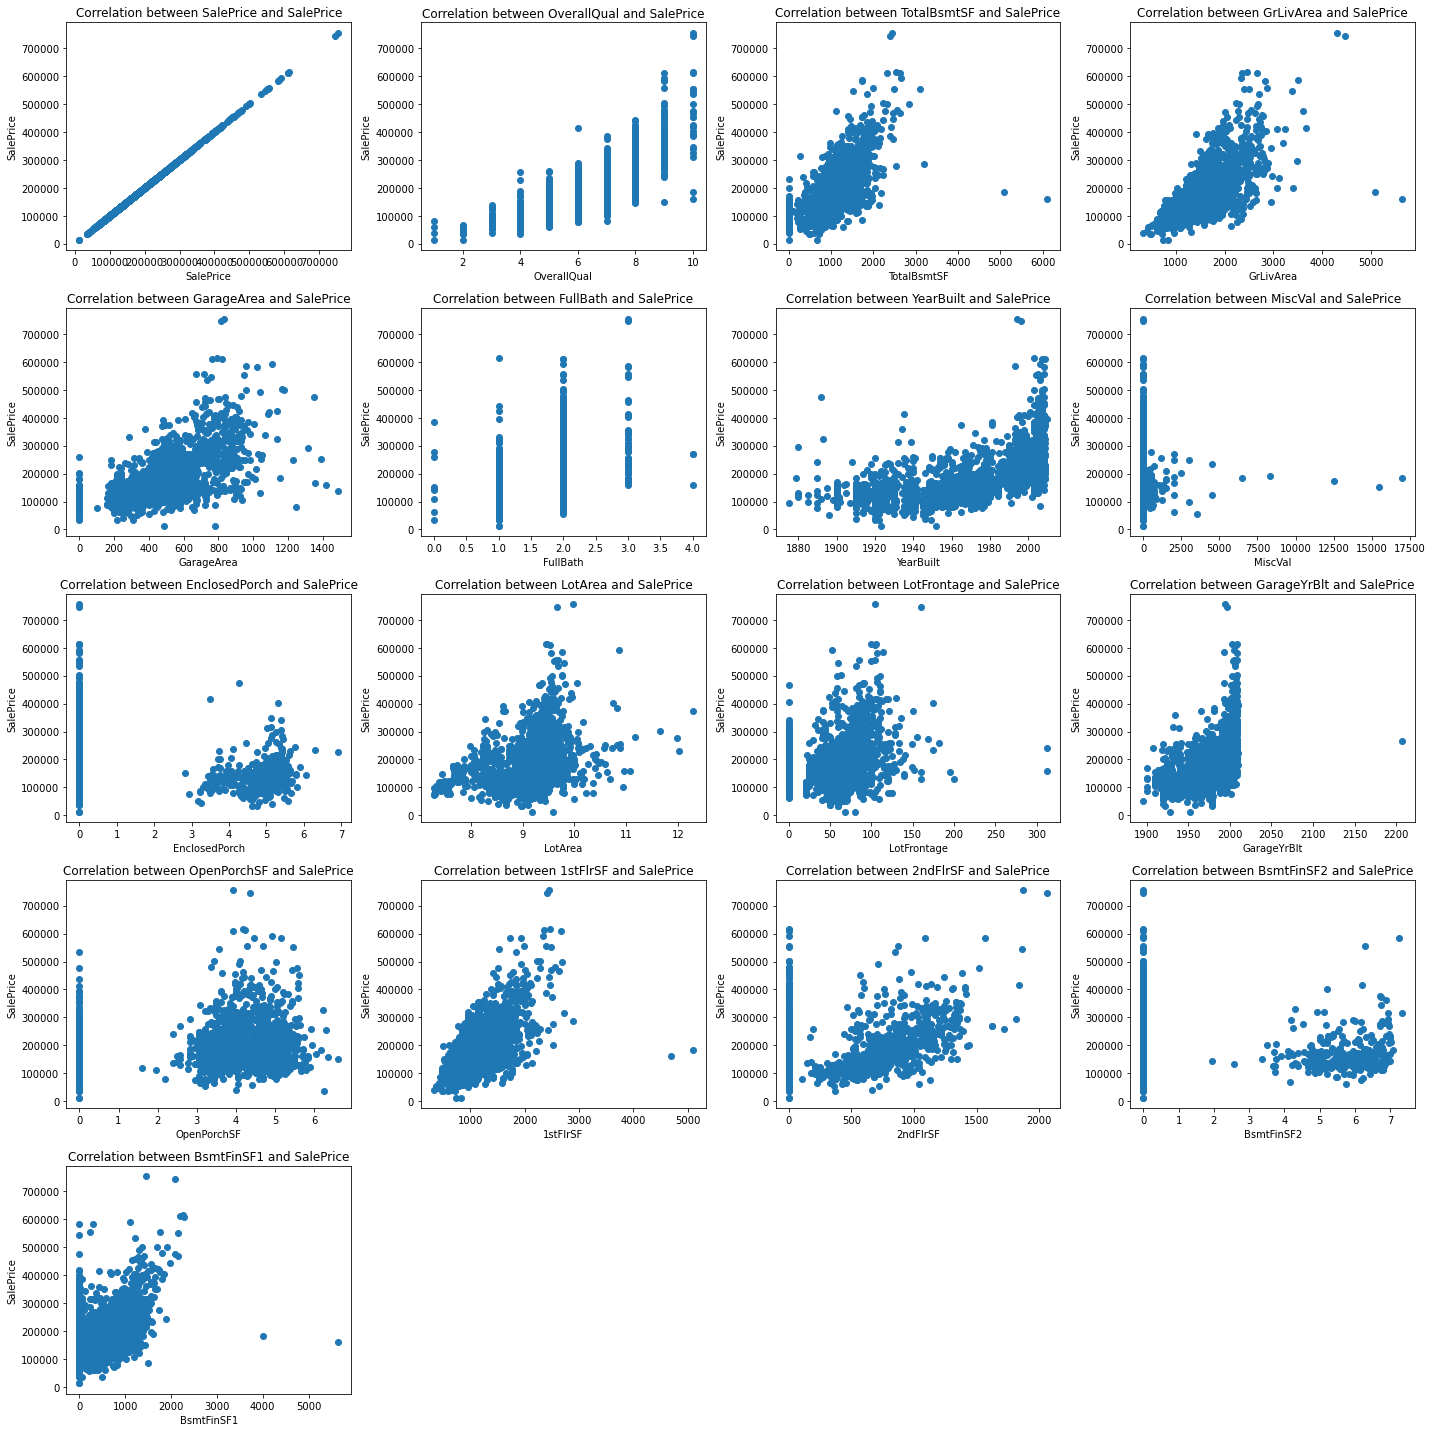

In [79]:
figure = plt.figure(figsize = (20, 20))
for (i,f) in enumerate(columns):
    plt.subplot(5,4,i+1)
    plt.scatter(train_df[f].tolist(),train_df['SalePrice'].tolist())
    plt.title('Correlation between {} and SalePrice'.format(f))
    plt.xlabel(f)
    plt.ylabel("SalePrice")
    plt.tight_layout()
plt.show()

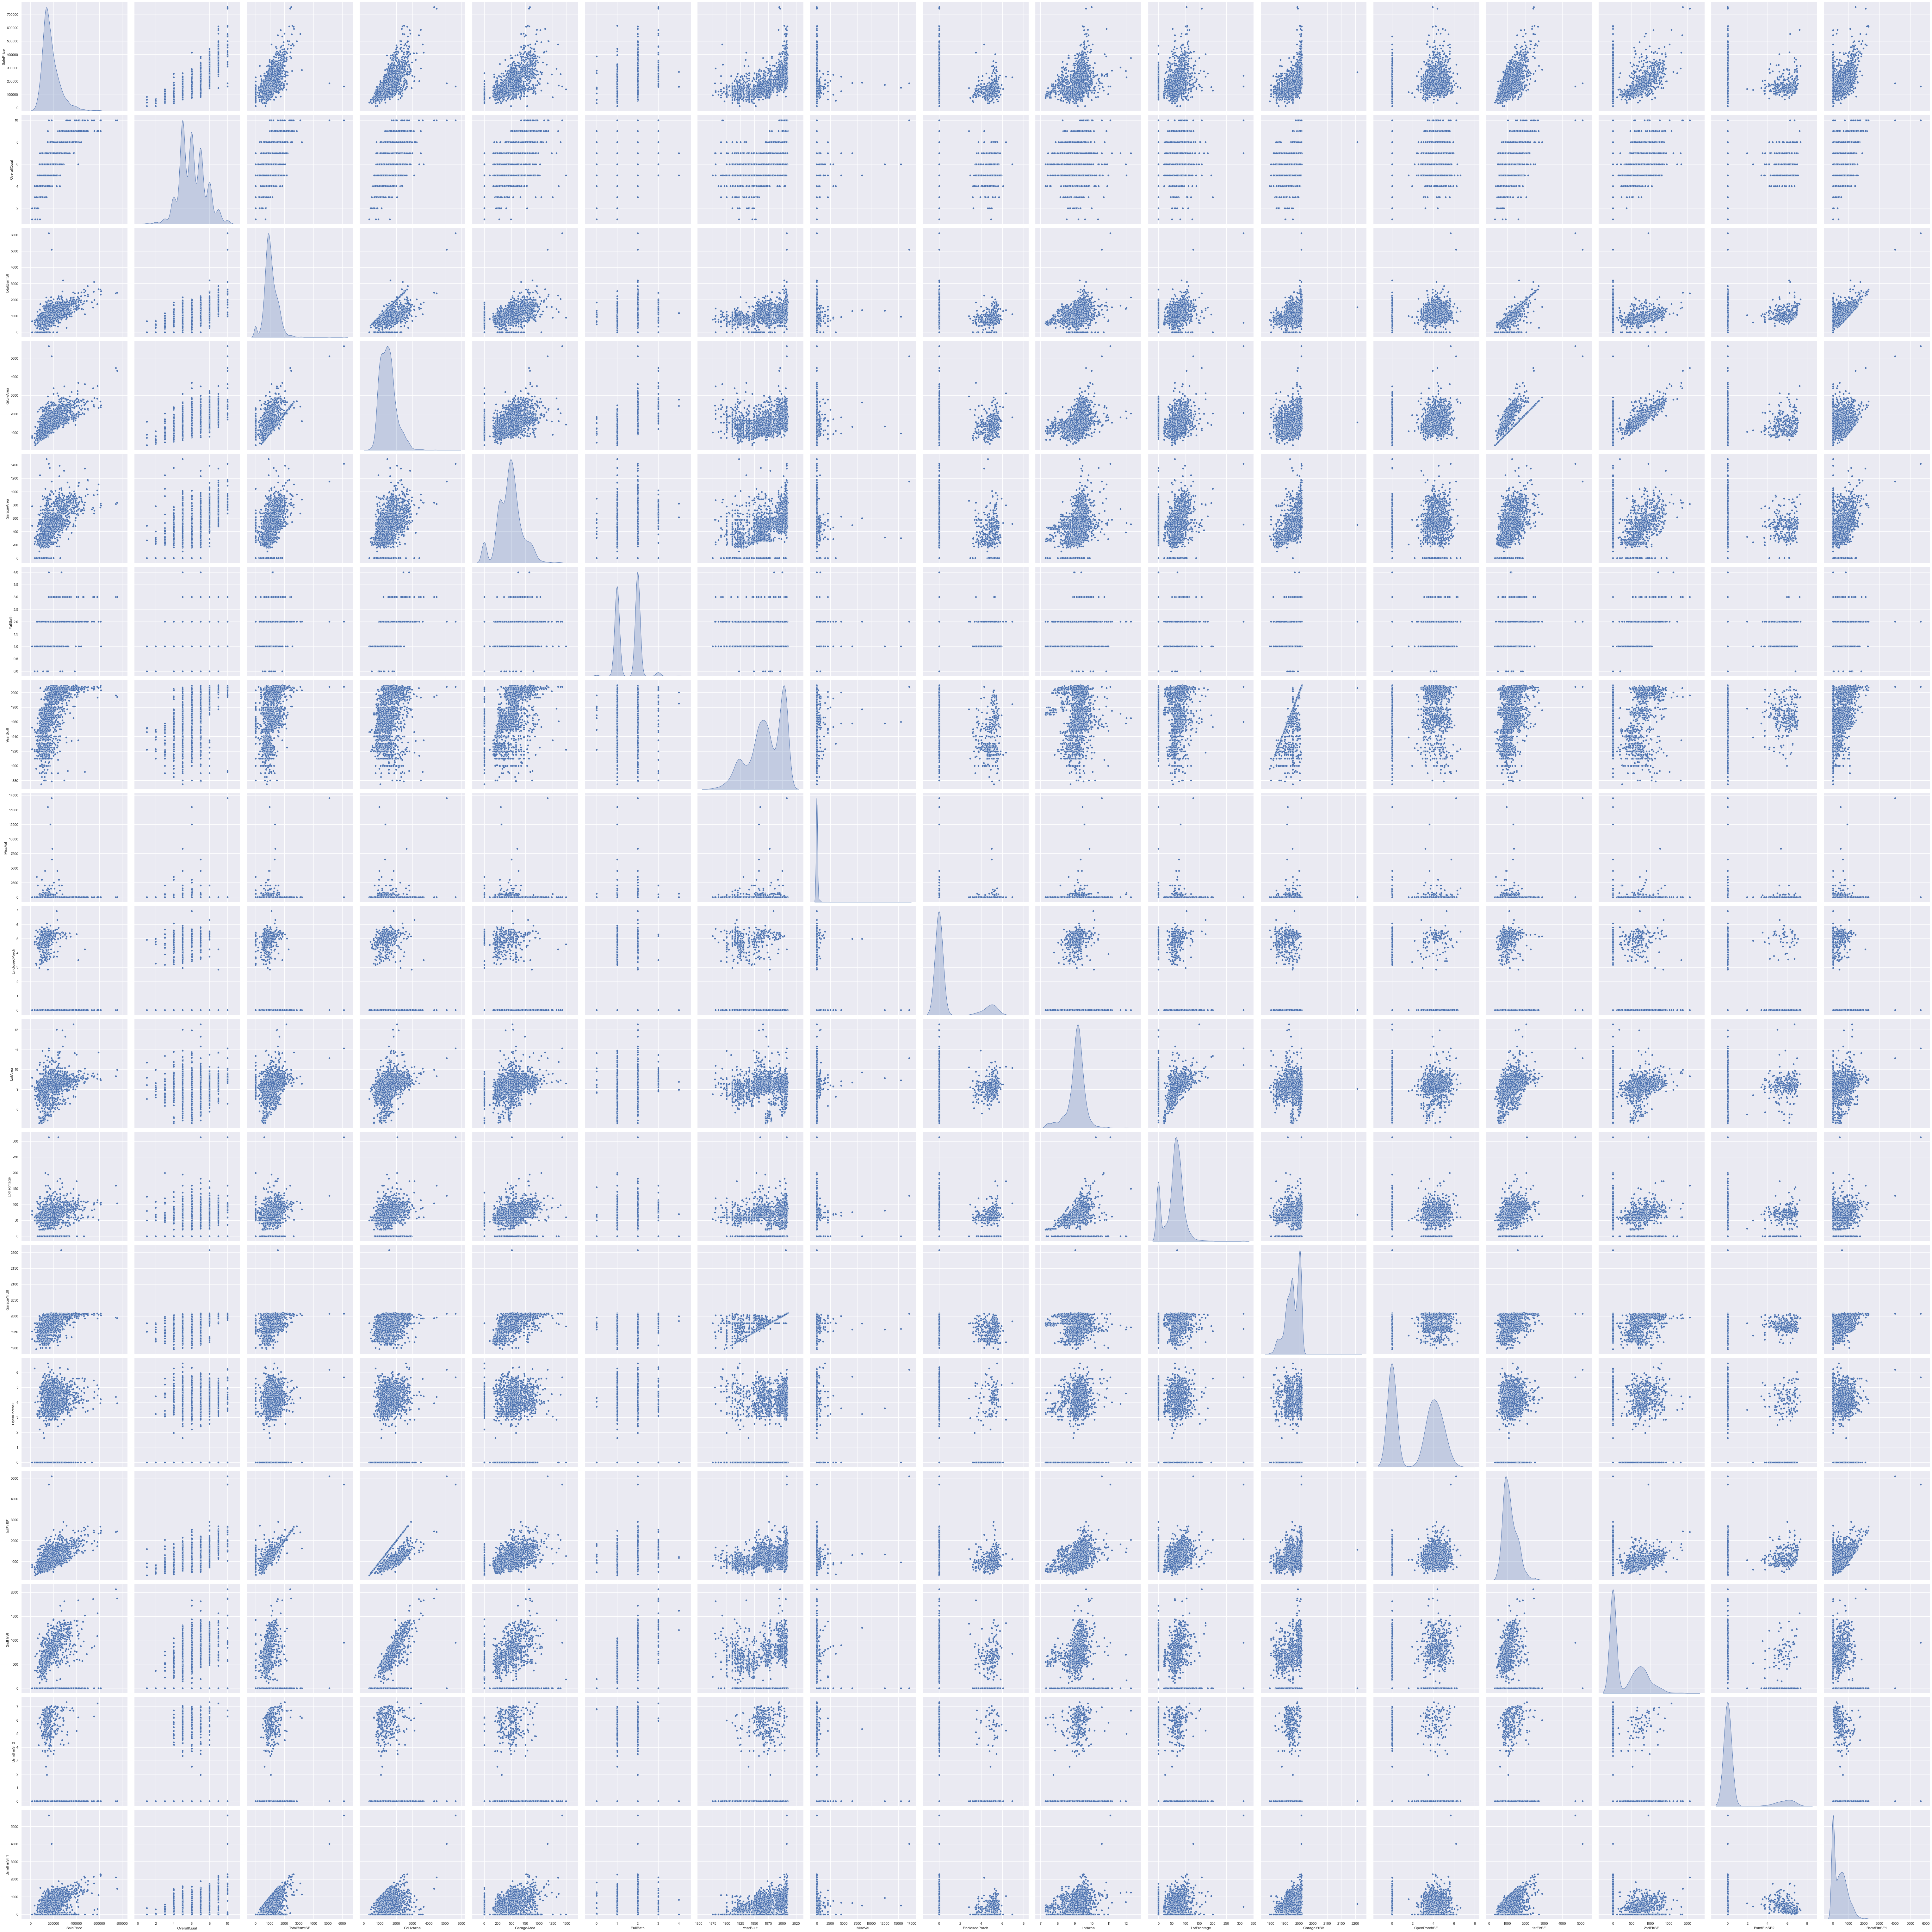

In [80]:
sns.set()
sns.pairplot(train_df[columns],size = 5, kind ='scatter', diag_kind='kde')
plt.tight_layout()
plt.show()

Analysis:
    
    -We can see dots drawing linear line between 'TotalBsmtSF' and 'GrLiveArea'. The dots stay below that line.It is not expected a basement area bigger than the above ground living area.
    
    -We can see an exponential relation between 'Sale Price' and 'YearBuilt'.
    
    -We can see an exponential relation for 'dots cloud'
    
    -Prices have a different dynamique than the pprevious years. It increase faster.

In [81]:
## Outliers: manually removing in training data:
train_df = train_df[train_df['SalePrice'] < 700000]
train_df = train_df[train_df['MiscVal'] < 100000]
train_df = train_df[train_df['EnclosedPorch'] < 400]
train_df = train_df[train_df['OpenPorchSF'] < 600]
train_df = train_df[train_df['WoodDeckSF'] < 1000]
train_df = train_df[train_df['GrLivArea'] < 4000]
train_df = train_df[train_df['1stFlrSF'] < 3000]
train_df = train_df[train_df['2ndFlrSF'] < 1500]
train_df = train_df[train_df['TotalBsmtSF'] < 4000]
train_df = train_df[train_df['BsmtFinSF2'] < 1200]
train_df = train_df[train_df['BsmtFinSF1'] < 3000]
train_df = train_df[train_df['MasVnrArea'] < 1000]
train_df = train_df[train_df['LotArea'] < 40000]
train_df = train_df[train_df['LotFrontage'] < 200]
train_df = train_df[train_df['GarageYrBlt'] < 2020]

## A simple model with two variables (three with target variables)

I want to work only with continous values. I select variables which have the higher correlation coefficients .Here I choose 'Gr Liv Area','Total Bsmt SF' accordig to the correlatiom matrix.

In [82]:
train_df.set_index('PID', inplace=True)

In [83]:
#preprocessed_df_sm = preprocessed_df[["Total Bsmt SF","Gr Liv Area","SalePrice"]]

### Create X, y

In [84]:
X=train_df.drop('SalePrice', axis=1).values
y=np.log10(train_df.SalePrice).values

### Split into train/test sets

In [85]:
X.shape

(2411, 213)

In [86]:
y.shape

(2411,)

In [87]:
train_df.shape

(2411, 214)

In [88]:
pred_df.shape

(500, 214)

In [89]:
#X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.042, random_state=0)
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.3, random_state=0)

In [90]:
print('Train:', X_tr.shape, y_tr.shape) 
print('Test:', X_te.shape, y_te.shape) 

Train: (1687, 213) (1687,)
Test: (724, 213) (724,)


Normally we have to apply ridge regression.
Before applying ridge regression we need to standardize them.
Here clearly we can see we have a different scale so we need here to standardize them.

In [91]:
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

The aim is lr = LinearRegression()to fit a linear regression model.

Thanks to the platform lessons we can use recursive feature elimination with automatic tuning of the number of features selected with cross validation.

Recursive feature elimination removes features builds a model using remaining attributes and calculates model accuracy.

In [92]:
lr = LinearRegression()

In [93]:
# Recursive feature elimination with the best 3 features
rfe_simple = RFE(lr, 3)
lr_simple = rfe_simple.fit(X_tr_rescaled, y_tr)

y_tr_simple_pred = lr_simple.predict(X_tr_rescaled)
y_te_simple_pred = lr_simple.predict(X_te_rescaled)

mae_simple = MAE(10**y_te, 10**y_te_simple_pred)

print('Train data MSE: {:.3f}'.format((MSE(y_tr,y_tr_simple_pred))))
print('Test data MSE: {:.3f}'.format((MSE(y_te,y_te_simple_pred))))

print('Train data score :{}'.format(lr_simple.score(X_tr_rescaled, y_tr)))
print('Test data score:{}'.format(lr_simple.score(X_te_rescaled, y_te)))

print('Train data MAE: {:.3f}'.format(MAE(10**y_tr, 10**y_tr_simple_pred)))
print('Test data MAE: {:.3f}'.format(MAE(10**y_te, 10**y_te_simple_pred)))
train_df.drop(columns=['SalePrice']).iloc[:, lr_simple.support_].head()

Train data MSE: 0.006
Test data MSE: 0.006
Train data score :0.8146184717439232
Test data score:0.7807385416699051
Train data MAE: 22646.971
Test data MAE: 22925.393


OverallQual  YearBuilt  GrLivArea
PID                                         
528275070            7       2000       2256
535305120            6       1951       1575
923228250            4       1970       1092
535152150            5       1959       1700
903475060            7       1910       1889

In [94]:
# Recursive feature elimination with the best 20 features (intermediate, between 10 and 20)
rfe_interm = RFE(lr, 20)
lr_interm = rfe_interm.fit(X_tr_rescaled, y_tr)

y_tr_interm_pred = lr_interm.predict(X_tr_rescaled)
y_te_interm_pred = lr_interm.predict(X_te_rescaled)

mae_interm = MAE(10**y_te, 10**y_te_interm_pred)

print('Train data MSE: {:.3f}'.format((MSE(y_tr, y_tr_interm_pred))))
print('Test data MSE: {:.3f}'.format((MSE(y_te, y_te_interm_pred))))

print('Train data score :{}'.format(lr_interm.score(X_tr_rescaled, y_tr)))
print('Test data score:{}'.format(lr_interm.score(X_te_rescaled, y_te)))

print('Train data MAE: {:.3f}'.format(MAE(10**y_tr, 10**y_tr_interm_pred)))
print('Test data MAE: {:.3f}'.format(MAE(10**y_te, 10**y_te_interm_pred)))
train_df.drop(columns=['SalePrice']).iloc[:, lr_interm.support_].head()

Train data MSE: 0.003
Test data MSE: 0.003
Train data score :0.9064929507615824
Test data score:0.892029028105605
Train data MAE: 14915.516
Test data MAE: 15260.106


LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
PID                                                                    
528275070  9.082052            7            5       2000    0.000000   
535305120  9.227296            6            6       1951    6.259581   
923228250  7.601902            4            5       1970    4.394449   
535152150  9.264165            5            5       1959    0.000000   
903475060  9.222368            7            4       1910    0.000000   

           BsmtUnfSF  TotalBsmtSF  GrLivArea  OverallGrade  GarageGrade  \
PID                                                                       
528275070      652.0        952.0       2256            35            9   
535305120      216.0        216.0       1575            36            9   
923228250      546.0        546.0       1092            20            9   
535152150      380.0       1398.0       1700            25            9   
903475060      925.0        925.0       1889            28            9   

           MSZoning_FV  MSZoning_RL  MSZoning_RM  Exterior1st_CemntBd  \
PID                                                                     
528275070            0            1            0                    0   
535305120            0            1            0                    0   
923228250            0            0            1                    1   
535152150            0            1            0                    0   
903475060            0            0            1                    0   

           Exterior2nd_CmentBd  MasVnrType_BrkFace  MasVnrType_None  \
PID                                                                   
528275070                    0                   0                1   
535305120                    0                   1                0   
923228250                    1                   1                0   
535152150                    0                   0                1   
903475060                    0                   0                1   

           MasVnrType_Stone  SaleType_New  SaleCondition_Normal  
PID                                                              
528275070                 0             0                     1  
535305120                 0             0                     1  
923228250                 0             0                     1  
535152150                 0             0                     1  
903475060                 0             0                     1

In [95]:
# Linear regression with all features
lr.fit(X_tr_rescaled, y_tr)

y_tr_lr_pred = lr.predict(X_tr_rescaled)
y_te_lr_pred = lr.predict(X_te_rescaled)

print('Train data MSE: {:.3f}'.format((MSE(y_tr, y_tr_lr_pred))))
print('Test data MSE: {:.3f}'.format((MSE(y_te, y_te_lr_pred))))

print('Train data score :{}'.format(lr.score(X_tr_rescaled, y_tr)))
print('Test data score:{}'.format(lr.score(X_te_rescaled, y_te)))

Train data MSE: 0.002
Test data MSE: 25686900.635
Train data score :0.9387613919150357
Test data score:-884360940.3999952


In [96]:
# Recursive feature elimination validation curve
# Variable to store the results
gs_results = []

for feature in range(1, 25): 
    # Create and fit linear regression 
    rfe = RFE(lr, feature) 
    rfe.fit(X_tr_rescaled, y_tr)
    # Save model and its performance on train/test sets
    gs_results.append({ 'feature': feature,
                        'train_mse': MSE(y_tr, rfe.predict(X_tr_rescaled)), 
                        'test_mse': MSE(y_te, rfe.predict(X_te_rescaled)), 
                        'train_mae': MAE(10**y_tr, 10**rfe.predict(X_tr_rescaled)), 
                        'test_mae': MAE(10**y_te, 10**rfe.predict(X_te_rescaled)),
})
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results) 
gs_results.head()

feature  train_mse  test_mse     train_mae      test_mae
0        1   0.009619  0.009663  30165.731791  29001.549817
1        2   0.007083  0.007513  24805.412061  24725.599737
2        3   0.005822  0.006369  22646.970544  22925.392821
3        4   0.004954  0.005271  19641.620436  20271.209286
4        5   0.004208  0.004344  18589.011100  18500.678473

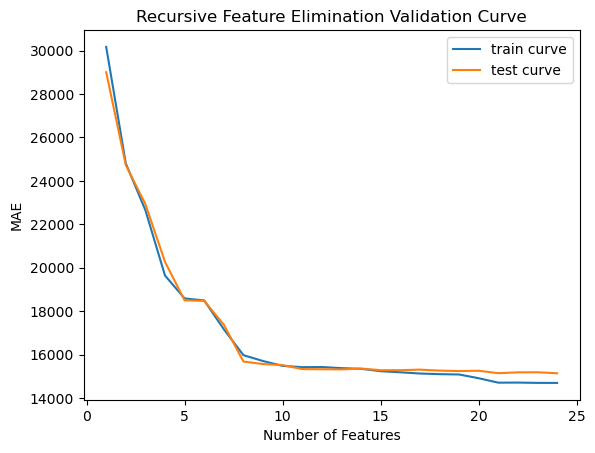

In [97]:
# Plot the validation curves
plt.style.use('default')
plt.plot(gs_results['feature'], gs_results['train_mae'], label='train curve') 
plt.plot(gs_results['feature'], gs_results['test_mae'], label='test curve') 
plt.xlabel('Number of Features')
plt.ylabel('MAE')
plt.title('Recursive Feature Elimination Validation Curve')
plt.legend()
plt.show()

# Regularization 

This method has as aim to add penalty on the coefficients.

Thanks to platform lessons we can see two methods to penalize coeffcients:
    
    -Ridge 
    
    -Lasso 

### Ridge regression

In [98]:
# Variable to store the results
gs_results = []

# We have to select different values  for alpha:
alphas = [0.1, 1, 1e1, 1e2, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]

# Grid search
# for alpha in np.logspace(1, 4, num=20):

for alpha in alphas:

    # Create and fit ridge regression 
    ridge = Ridge(alpha=alpha) 
    ridge.fit(X_tr_rescaled, y_tr)
    y_tr_pred_ridge = ridge.predict(X_tr_rescaled)
    y_te_pred_ridge = ridge.predict(X_te_rescaled)
    # Save model and its performance on train/test sets
    gs_results.append({ 'alpha': alpha,
                        'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)), 
                        'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)), 
                        'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)), 
                        'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
})
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results) 
gs_results.head()

alpha  train_mse     train_mae  test_mse      test_mae
0     0.1   0.001923  11398.814648  0.002738  13186.829948
1     1.0   0.001925  11394.151075  0.002723  13153.116918
2    10.0   0.001944  11394.625770  0.002669  13109.859540
3   100.0   0.002062  11629.181393  0.002702  13150.722592
4  1000.0   0.002527  13349.908564  0.002976  13731.715554

We can observe that it is useful to do power 10 for the MAE measure because we need a score in dollars and not log-dollars!

Problem we use logarithm of the sale price !

We try to test different values for the best alpha value, normally this value will be not far from the true optimal alpha value.

Thanks to platform lessons we learn a good method to check the score we find: to average the scores on different train/test splits to find more stable results.

-->Platform lessons call this step cross validation.
    

In [99]:
#Cross validation
# Fit/test N models
gs_results = []
# alphas = [0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]

for run_idx in range(10):
    # Split into train/test sets
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=0)
      
    # Standardize features
    X_tr_rescaled = scaler.fit_transform(X_tr) 
    X_te_rescaled = scaler.transform(X_te)
    
    # Grid search
    for alpha in np.logspace(-1, 4, num=20):

        # Create and fit ridge regression 
        ridge = Ridge(alpha=alpha) 
        ridge.fit(X_tr_rescaled, y_tr)
        # Save model and its performance on train/test sets
        gs_results.append({ 
            'model': ridge, 
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)), 
            'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)), 
            'test_mse': MSE(y_te, ridge.predict(X_te_rescaled)), 
            'test_mae': MAE(10**y_te, 10**ridge.predict(X_te_rescaled)),
})
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results) 
gs_results.head()

model     alpha  run_idx  train_mse  \
0                  Ridge(alpha=0.1)  0.100000        0   0.001923   
1  Ridge(alpha=0.18329807108324356)  0.183298        0   0.001923   
2  Ridge(alpha=0.33598182862837817)  0.335982        0   0.001924   
3   Ridge(alpha=0.6158482110660264)  0.615848        0   0.001924   
4   Ridge(alpha=1.1288378916846888)  1.128838        0   0.001925   

      train_mae  test_mse      test_mae  
0  11398.814648  0.002738  13186.829948  
1  11397.866998  0.002737  13182.991203  
2  11396.466641  0.002734  13176.316604  
3  11395.380465  0.002729  13165.049587  
4  11393.819421  0.002721  13150.093062

In [100]:
# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')
  
# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mae.mean() 
mean_te = gb_alpha.test_mae.mean() 
std_tr = gb_alpha.train_mae.std() 
std_te = gb_alpha.test_mae.std() 
alphas = mean_tr.index.values
  
# Get entry with the best mean test MSE
best_alpha = mean_te.idxmin()
best_result = gb_alpha.get_group(best_alpha)

# Print the details
print('Best alpha: {:.1e}'.format(best_alpha)) 
print('Test MSE: {:.4f}'.format(best_result.test_mse.mean())) 
print('Test MAE: {:.0f}'.format(best_result.test_mae.mean()))

Best alpha: 7.0e+00
Test MSE: 0.0027
Test MAE: 13106


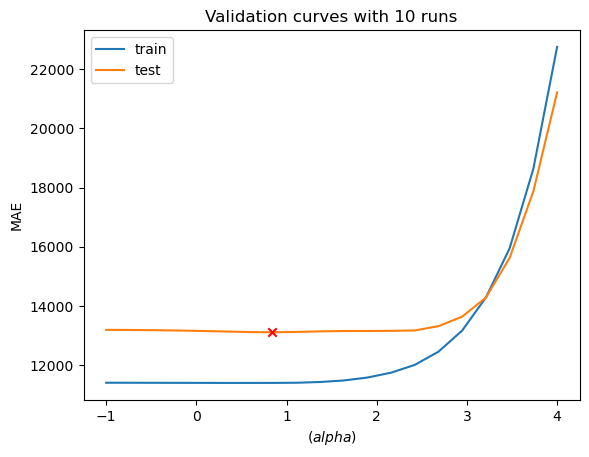

In [101]:
# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label='train') 
plt.plot(np.log10(alphas), mean_te, label='test')
# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha=0.2) 
plt.fill_between(np.log10(alphas), mean_te-std_te, mean_te+std_te, alpha=0.2)
# Add marker for best score
plt.scatter(np.log10(best_alpha), mean_te.min(), marker='x', c='red', zorder=10)

plt.title('Validation curves with {} runs'.format(len(gs_results.groupby('run_idx')))) 
plt.xlabel('$(alpha)$')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [102]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100, 200])
ridge.fit(X_tr_rescaled,y_tr)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_tr_rescaled,y_tr)

alpha = ridge.alpha_
print("Best alpha :", alpha)
print(MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)))
print(MAE(10**y_te, 10**ridge.predict(X_te_rescaled)))


best alpha 100.0
Try again for more precision with alphas centered around 100.0
Best alpha : 140.0
11729.364148350953
13153.955176451174


In [103]:
y_tr_rdg = ridge.predict(X_tr_rescaled)
y_te_rdg = ridge.predict(X_te_rescaled)

## Computing baseline

In [104]:
mae_base = np.mean(np.abs(10**y_te - 10**np.mean(y_tr)))
mae_ridge = MAE(10**y_te, 10**y_te_rdg)

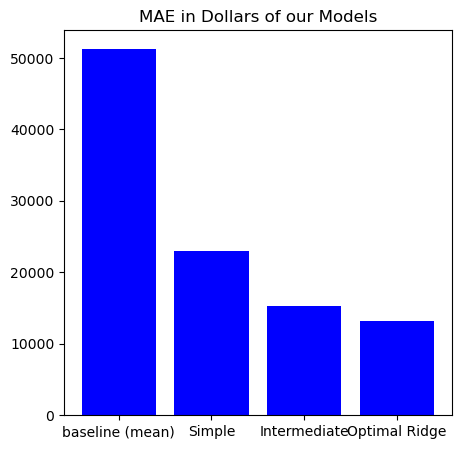

In [105]:
fig = plt.figure(figsize=(5,5))
plt.bar([1, 2, 3, 4],[mae_base, mae_simple, mae_interm, mae_ridge], color="blue")
plt.xticks([1, 2, 3, 4], ['baseline (mean)', 'Simple','Intermediate','Optimal Ridge'])
plt.title('MAE in Dollars of our Models')
plt.show()

# Evaluate my predictions

In [106]:
pred_df.set_index('PID', inplace=True)

In [107]:
pred_df.shape

(500, 213)

In [108]:
X_te_rescaled.shape

(724, 213)

In [109]:
X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.042, random_state=0)

In [110]:
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

In [111]:
pred_scaled = scaler.transform(pred_df)

### Simple model predictions

In [112]:
predictions_simple = lr_simple.predict(pred_scaled)

In [113]:
pred_df['predictions_simple'] = predictions_simple

In [114]:
pred_df['SalePrice'] = 10**pred_df['predictions_simple']

In [115]:
pred_df['SalePrice'].head()

PID
909279080    170186.117315
907126050    131966.697132
528144030    285466.927496
535452060    123084.027728
911202100     88736.967469
Name: SalePrice, dtype: float64

In [116]:
pred_df.reset_index(inplace=True)

In [117]:
predictions_df = pred_df[['PID','SalePrice']]
predictions_df.head()

PID      SalePrice
0  909279080  170186.117315
1  907126050  131966.697132
2  528144030  285466.927496
3  535452060  123084.027728
4  911202100   88736.967469

In [118]:
predictions_df['SalePrice'].describe()

count       500.000000
mean     185667.854359
std       84664.520265
min       63210.123849
25%      125563.381479
50%      163918.840350
75%      221940.890412
max      927674.962970
Name: SalePrice, dtype: float64

In [119]:
predictions_df.to_csv('predictions-simple-model.csv', index=False, float_format='%.0f')

### Intermediate model predictions

In [120]:
predictions_interm = lr_interm.predict(pred_scaled)

In [121]:
pred_df['predictions_interm'] = predictions_interm

In [122]:
pred_df['SalePrice'] = 10**pred_df['predictions_interm']

In [123]:
pred_df['SalePrice'].head()

0    186490.092614
1    155963.594445
2    280063.557030
3    124954.576502
4     83423.580858
Name: SalePrice, dtype: float64

In [124]:
pred_df.reset_index(inplace=True)

In [125]:
predictions_df = pred_df[['PID','SalePrice']]
predictions_df.head()

PID      SalePrice
0  909279080  186490.092614
1  907126050  155963.594445
2  528144030  280063.557030
3  535452060  124954.576502
4  911202100   83423.580858

In [126]:
predictions_df['SalePrice'].describe()

count    5.000000e+02
mean     1.860041e+05
std      9.836715e+04
min      4.464928e+04
25%      1.303230e+05
50%      1.621977e+05
75%      2.160789e+05
max      1.404943e+06
Name: SalePrice, dtype: float64

In [127]:
predictions_df.to_csv('predictions-intermediate-model.csv', index=False, float_format='%.0f')

### Complex model predictions

In [128]:
predictions_ridge=ridge.predict(pred_scaled)

In [129]:
pred_df['predictions_ridge'] = predictions_ridge

In [130]:
pred_df['SalePrice'] = 10**pred_df['predictions_ridge']

In [131]:
pred_df['SalePrice'].head()

0    188840.401951
1    148942.708262
2    282939.342794
3    122508.497695
4     93524.192212
Name: SalePrice, dtype: float64

In [132]:
pred_df.reset_index(inplace=True)

In [133]:
predictions_df = pred_df[['PID','SalePrice']]
predictions_df.head()

PID      SalePrice
0  909279080  188840.401951
1  907126050  148942.708262
2  528144030  282939.342794
3  535452060  122508.497695
4  911202100   93524.192212

In [134]:
predictions_df['SalePrice'].describe()

count       500.000000
mean     185922.236266
std       87749.882393
min       53178.277472
25%      131902.941566
50%      160288.387677
75%      215707.499889
max      957845.549263
Name: SalePrice, dtype: float64

In [135]:
predictions_df.to_csv('predictions-complex-model.csv', index=False, float_format='%.0f')